<a href="https://colab.research.google.com/github/JulioPB22/Proyecto-Bootcamp-ML/blob/main/Salud_de_las_plantulas_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto Bootcamp ML CodigoFacilito

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Cargamos el conjunto de datos
df = pd.read_excel('/content/plantulas_hidroponia.xlsx')

In [ ]:
# Información General de la base de datos
print("Shape of the dataset:", df.shape)
display(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe().T)

Shape of the dataset: (1200, 14)


Timestamp  Plantula_ID  Humedad_Sustrato_[%]  \
0 2024-10-03 10:54:53.408            1             27.521109   
1 2024-10-03 16:54:53.408            1             14.835566   
2 2024-10-03 22:54:53.408            1             17.086362   
3 2024-10-04 04:54:53.408            1             15.336156   
4 2024-10-04 10:54:53.408            1             39.822216   

   Temperatura_Ambiental_[°C]  Temperatura_Sustrato_[°C]  Humedad_[%]  \
0                   22.240245                  21.900435    55.291904   
1                   21.706763                  18.680892    63.949181   
2                   21.180946                  15.392939    67.837956   
3                   22.593302                  22.778394    58.190811   
4                   28.929001                  18.100937    63.772036   

   Intensidad_Luminica_[LUX]  pH_Sustrato  Concentración_de_Nitrógeno_[mg/kg]  \
0                 556.172805     5.581955                           10.003650   
1                 596.136721     7.135705                           30.712562   
2                 591.124627     5.656852                           29.337002   
3                 241.412476     5.584523                           16.966621   
4                 444.493830     5.919707                           10.944961   

   Concentración_de_Fósforo_[mg/kg]  Concentración_de_Potasio_[mg/kg]  \
0                         45.806852                         39.076199   
1                         25.394393                         17.944826   
2                         27.573892                         35.706530   
3                         26.180705                         26.257746   
4                         37.898907                         37.654483   

   Contenido_de_Clorofila_[mg/m^2]  Señal_Electroquímica_[mV]  \
0                        35.703006                   0.941402   
1                        27.993296                   0.164899   
2                        43.646308                   1.081728   
3                        37.838095                   1.186088   
4                        48.265812                   1.609805   

  Estado_de_salud_plantula  
0              Estrés alto  
1              Estrés alto  
2              Estrés alto  
3              Estrés alto  
4              Estrés alto


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Timestamp                           1200 non-null   datetime64[ns]
 1   Plantula_ID                         1200 non-null   int64         
 2   Humedad_Sustrato_[%]                1200 non-null   float64       
 3   Temperatura_Ambiental_[°C]          1200 non-null   float64       
 4   Temperatura_Sustrato_[°C]           1200 non-null   float64       
 5   Humedad_[%]                         1200 non-null   float64       
 6   Intensidad_Luminica_[LUX]           1200 non-null   float64       
 7   pH_Sustrato                         1200 non-null   float64       
 8   Concentración_de_Nitrógeno_[mg/kg]  1200 non-null   float64       
 9   Concentración_de_Fósforo_[mg/kg]    1200 non-null   float64       
 10  Co

count                           mean  \
Timestamp                             1200  2024-10-18 07:54:53.458799872   
Plantula_ID                         1200.0                            5.5   
Humedad_Sustrato_[%]                1200.0                      25.106918   
Temperatura_Ambiental_[°C]          1200.0                       23.99913   
Temperatura_Sustrato_[°C]           1200.0                      19.957794   
Humedad_[%]                         1200.0                      54.853165   
Intensidad_Luminica_[LUX]           1200.0                     612.637265   
pH_Sustrato                         1200.0                       6.524102   
Concentración_de_Nitrógeno_[mg/kg]  1200.0                      30.106751   
Concentración_de_Fósforo_[mg/kg]    1200.0                      30.264484   
Concentración_de_Potasio_[mg/kg]    1200.0                      30.112088   
Contenido_de_Clorofila_[mg/m^2]     1200.0                      34.749591   
Señal_Electroquímica_[mV]           1200.0                       0.987764   

                                                           min  \
Timestamp                           2024-10-03 10:54:53.408000   
Plantula_ID                                                1.0   
Humedad_Sustrato_[%]                                 10.000724   
Temperatura_Ambiental_[°C]                           18.001993   
Temperatura_Sustrato_[°C]                             15.00371   
Humedad_[%]                                          40.028758   
Intensidad_Luminica_[LUX]                           200.615482   
pH_Sustrato                                           5.507392   
Concentración_de_Nitrógeno_[mg/kg]                    10.00365   
Concentración_de_Fósforo_[mg/kg]                      10.01769   
Concentración_de_Potasio_[mg/kg]                     10.000606   
Contenido_de_Clorofila_[mg/m^2]                      20.025511   
Señal_Electroquímica_[mV]                             0.002376   

                                                              25%  \
Timestamp                           2024-10-10 21:24:53.429499904   
Plantula_ID                                                   3.0   
Humedad_Sustrato_[%]                                    17.131893   
Temperatura_Ambiental_[°C]                              21.101766   
Temperatura_Sustrato_[°C]                               17.353027   
Humedad_[%]                                             47.019694   
Intensidad_Luminica_[LUX]                              416.878983   
pH_Sustrato                                              6.026042   
Concentración_de_Nitrógeno_[mg/kg]                      20.249774   
Concentración_de_Fósforo_[mg/kg]                        20.894445   
Concentración_de_Potasio_[mg/kg]                        19.585561   
Contenido_de_Clorofila_[mg/m^2]                          27.46335   
Señal_Electroquímica_[mV]                                0.487982   

                                                              50%  \
Timestamp                           2024-10-18 07:54:53.451000064   
Plantula_ID                                                   5.5   
Humedad_Sustrato_[%]                                    25.168333   
Temperatura_Ambiental_[°C]                              23.889044   
Temperatura_Sustrato_[°C]                               19.911473   
Humedad_[%]                                             54.692069   
Intensidad_Luminica_[LUX]                              617.240221   
pH_Sustrato                                              6.540524   
Concentración_de_Nitrógeno_[mg/kg]                       30.13859   
Concentración_de_Fósforo_[mg/kg]                        30.019385   
Concentración_de_Potasio_[mg/kg]                        30.495054   
Contenido_de_Clorofila_[mg/m^2]                         34.433427   
Señal_Electroquímica_[mV]                                0.981647   

                                                              75%  \
Timestamp                     

Información del conjunto de datos

In [ ]:
# Valores faltantes y duplicados
print(f'\nValores faltantes: {df.isna().sum().sum()}')
print(f'Valores duplicados: {df.duplicated().sum()}')


Valores faltantes: 0
Valores duplicados: 0


## Exploración de valor único

In [ ]:
# Mostramos el número de valores únicos en cada columna
unique_counts = df.nunique()
print("Número de valores únicos en cada columna:")
print(unique_counts)

Número de valores únicos en cada columna:
Timestamp                             1200
Plantula_ID                             10
Humedad_Sustrato_[%]                  1200
Temperatura_Ambiental_[°C]            1200
Temperatura_Sustrato_[°C]             1200
Humedad_[%]                           1200
Intensidad_Luminica_[LUX]             1200
pH_Sustrato                           1200
Concentración_de_Nitrógeno_[mg/kg]    1200
Concentración_de_Fósforo_[mg/kg]      1200
Concentración_de_Potasio_[mg/kg]      1200
Contenido_de_Clorofila_[mg/m^2]       1200
Señal_Electroquímica_[mV]             1200
Estado_de_salud_plantula                 3
dtype: int64


In [ ]:
# Separamos columnas numéricas y categóricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist() # Convertir a lista para poder añadir elementos

# Agregar 'Timestamp' a las columnas categóricas
categorical_columns.append('Timestamp')

# Mostramos las listas de columnas numéricas y categóricas
print("Columnas numéricas:")
print(numeric_columns)
print("\nColumnas categóricas:")
print(categorical_columns)

Columnas numéricas:
Index(['Plantula_ID', 'Humedad_Sustrato_[%]', 'Temperatura_Ambiental_[°C]',
       'Temperatura_Sustrato_[°C]', 'Humedad_[%]', 'Intensidad_Luminica_[LUX]',
       'pH_Sustrato', 'Concentración_de_Nitrógeno_[mg/kg]',
       'Concentración_de_Fósforo_[mg/kg]', 'Concentración_de_Potasio_[mg/kg]',
       'Contenido_de_Clorofila_[mg/m^2]', 'Señal_Electroquímica_[mV]'],
      dtype='object')

Columnas categóricas:
['Estado_de_salud_plantula', 'Timestamp']


In [ ]:
# Mostramos valores únicos para cada columna categórica
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"\nValores únicos en la columna '{column}':")
    print(unique_values)


Valores únicos en la columna 'Estado_de_salud_plantula':
['Estrés alto' 'Estrés moderado' 'Saludable']

Valores únicos en la columna 'Timestamp':
<DatetimeArray>
['2024-10-03 10:54:53.408000', '2024-10-03 16:54:53.408000',
 '2024-10-03 22:54:53.408000', '2024-10-04 04:54:53.408000',
 '2024-10-04 10:54:53.408000', '2024-10-04 16:54:53.408000',
 '2024-10-04 22:54:53.408000', '2024-10-05 04:54:53.408000',
 '2024-10-05 10:54:53.408000', '2024-10-05 16:54:53.408000',
 ...
 '2024-10-30 22:54:53.494000', '2024-10-31 04:54:53.494000',
 '2024-10-31 10:54:53.494000', '2024-10-31 16:54:53.494000',
 '2024-10-31 22:54:53.494000', '2024-11-01 04:54:53.494000',
 '2024-11-01 10:54:53.494000', '2024-11-01 16:54:53.494000',
 '2024-11-01 22:54:53.494000', '2024-11-02 04:54:53.494000']
Length: 1200, dtype: datetime64[ns]


## Análisis exploratorio de datos

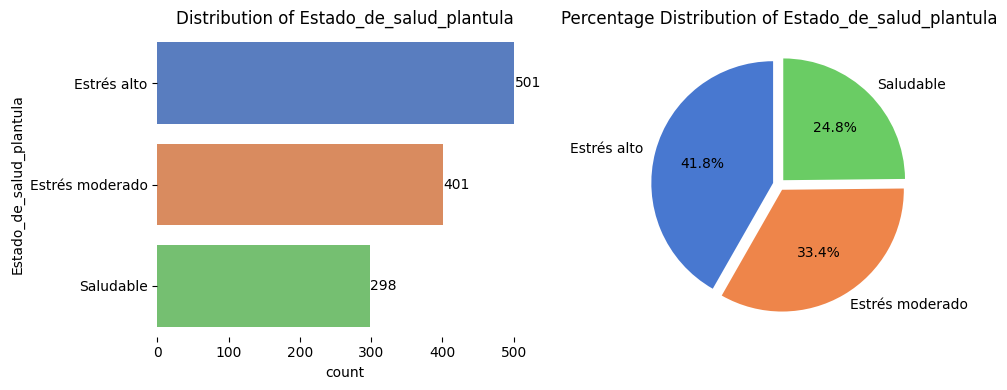

In [ ]:
column_name = 'Estado_de_salud_plantula'
plt.figure(figsize=(10, 4))

# First subplot: Count plot
plt.subplot(1, 2, 1)
sns.countplot(y=column_name, data=df, palette='muted')
plt.title(f'Distribution of {column_name}')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

sns.despine(left=True, bottom=True)

# Second subplot: Pie chart
plt.subplot(1, 2, 2)
df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*df[column_name].nunique())
plt.title(f'Percentage Distribution of {column_name}')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Identificamos las marcas de tiempo más antiguas y más recientes
earliest_timestamp = df['Timestamp'].min()
latest_timestamp = df['Timestamp'].max()

print(f"Fecha y hora más antigua: {earliest_timestamp}")
print(f"Fecha y hora más reciente: {latest_timestamp}")

Fecha y hora más antigua: 2024-10-03 10:54:53.408000
Fecha y hora más reciente: 2024-11-02 04:54:53.494000


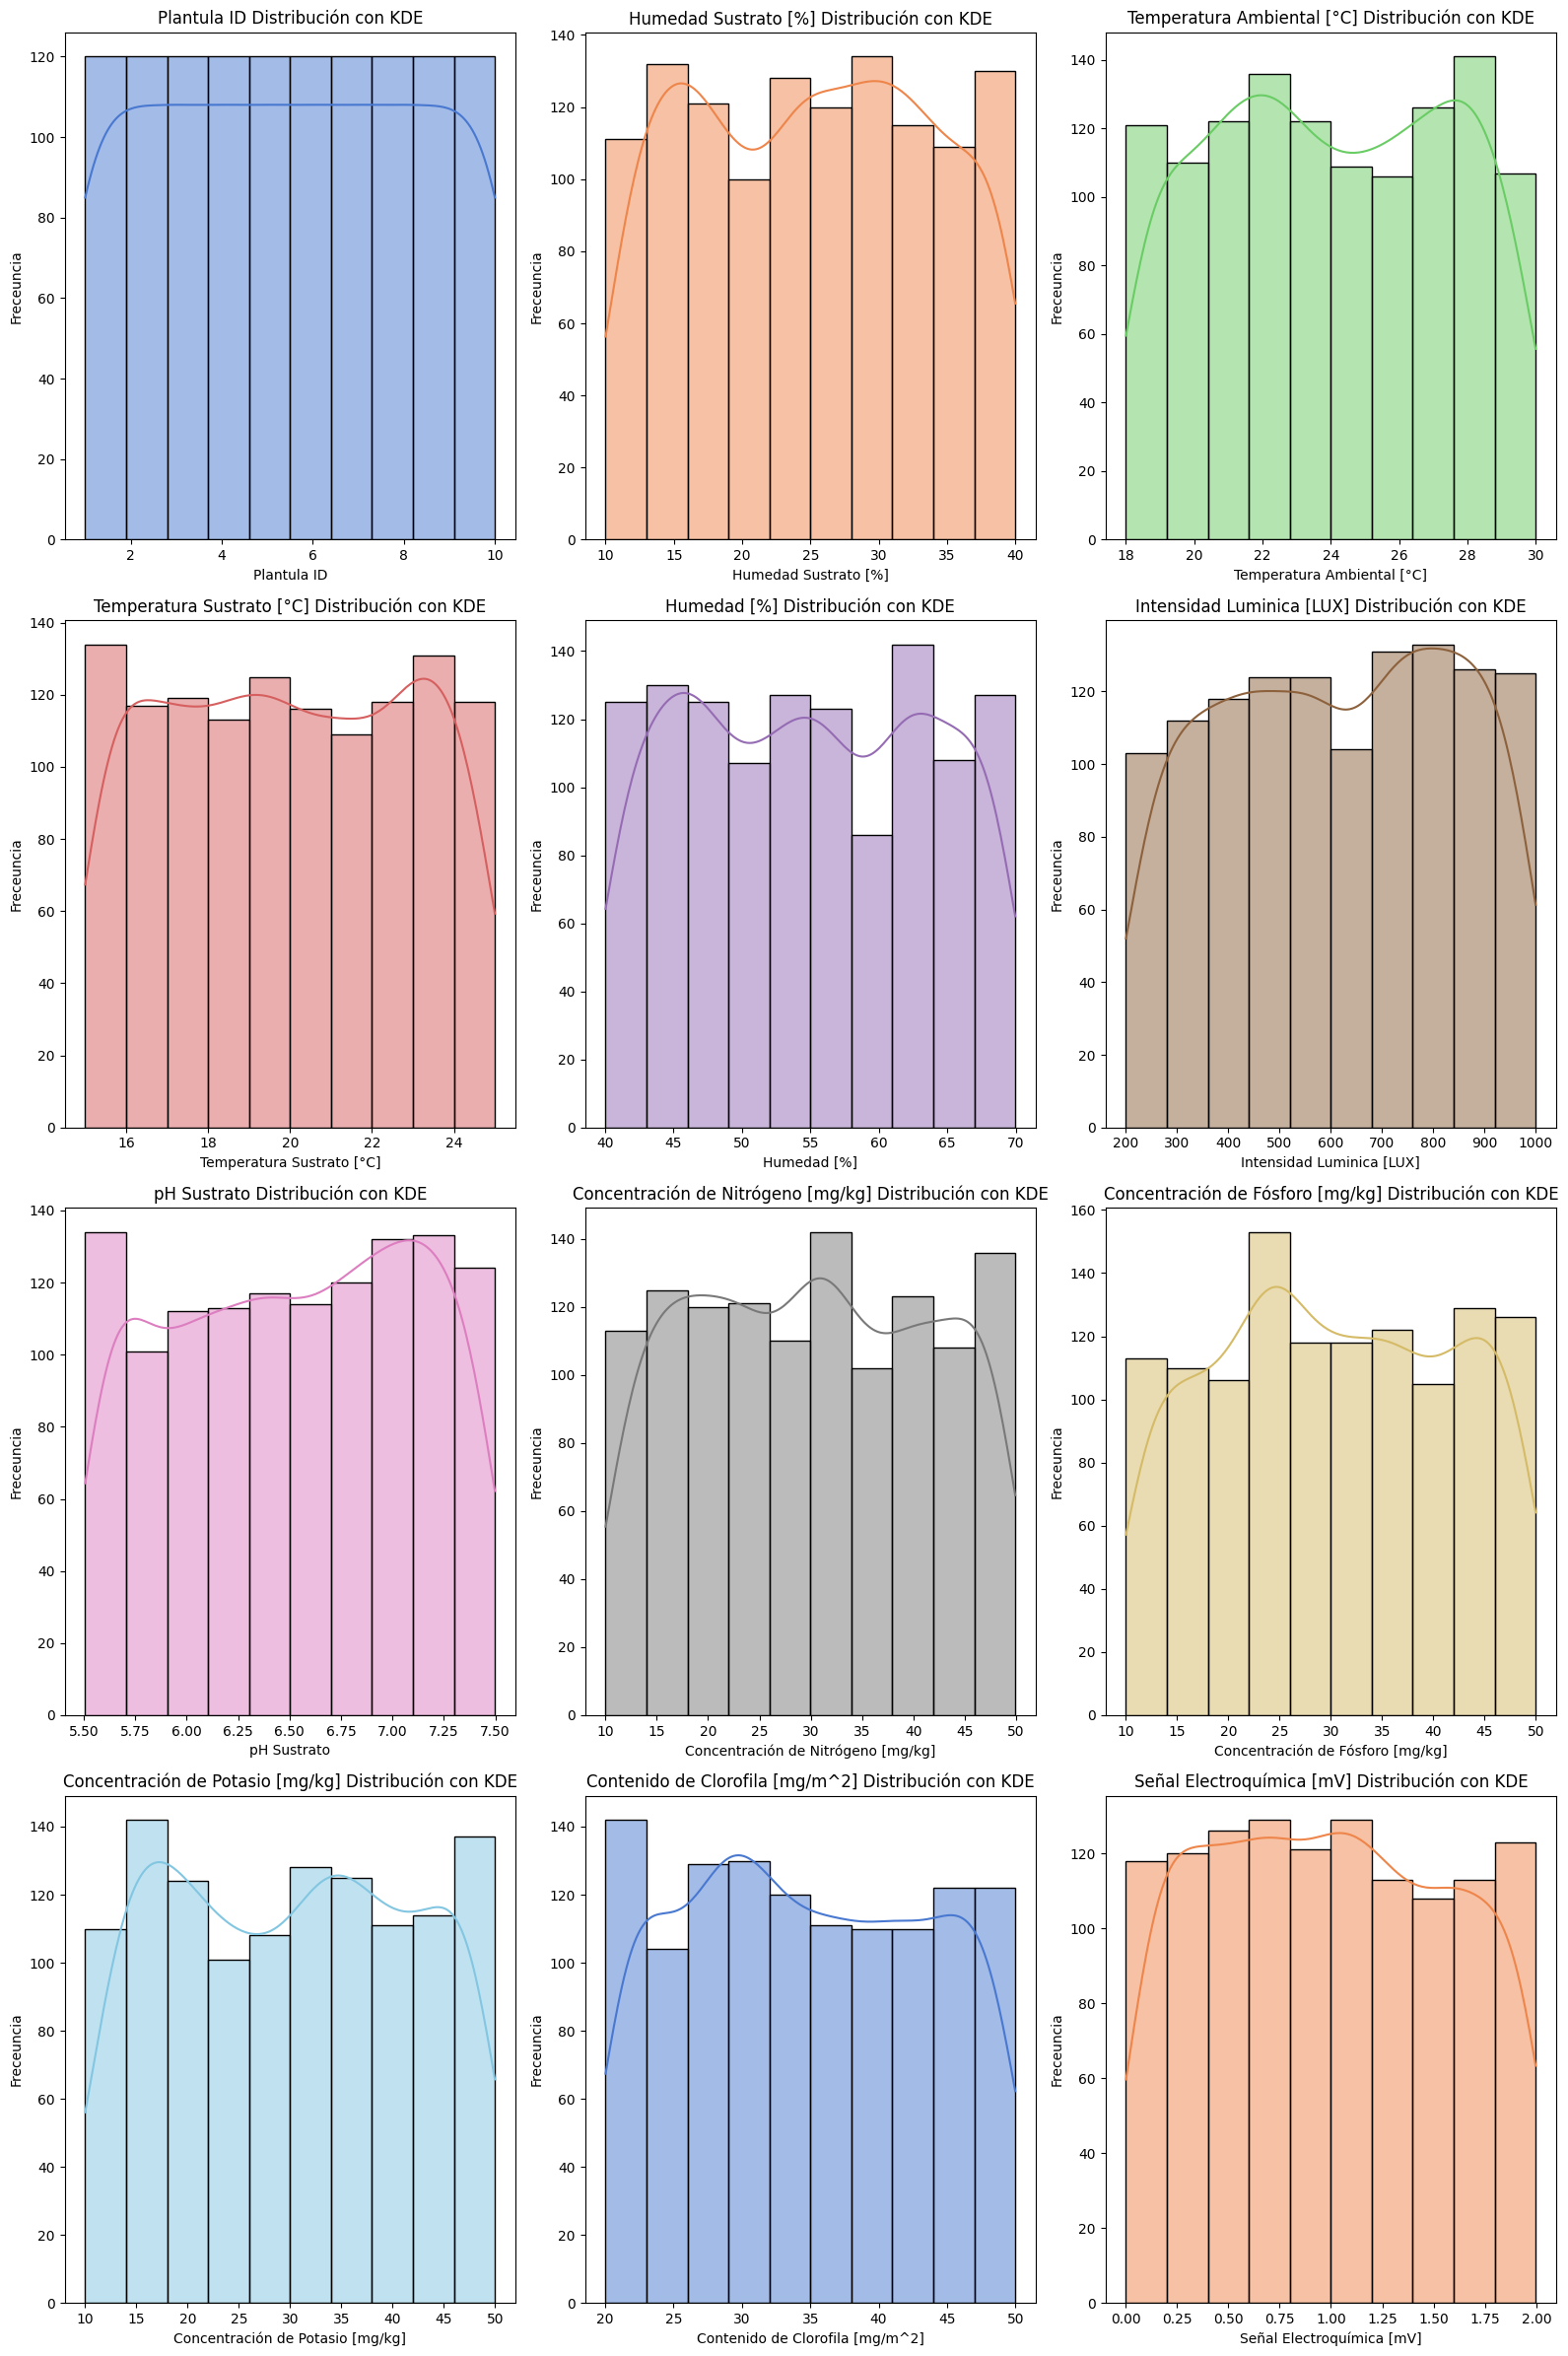

In [ ]:
# Análisis univariado para columnas numéricas
def univariate_analysis(data, columns):
    plt.figure(figsize=(16, 24))  # Ajustando tamaños para más gráficas

    muted_colors = sns.color_palette("muted", len(columns))

    for i, column in enumerate(columns):
        plt.subplot(4, 3, i + 1)
        sns.histplot(data[column], kde=True, bins=10, color=muted_colors[i])
        plt.title(f'{column.replace("_", " ")} Distribución con KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Freceuncia')

    plt.tight_layout()
    plt.show()

columns_to_analyze = [
    'Plantula_ID', 'Humedad_Sustrato_[%]', 'Temperatura_Ambiental_[°C]',
    'Temperatura_Sustrato_[°C]', 'Humedad_[%]', 'Intensidad_Luminica_[LUX]',
    'pH_Sustrato', 'Concentración_de_Nitrógeno_[mg/kg]',
    'Concentración_de_Fósforo_[mg/kg]', 'Concentración_de_Potasio_[mg/kg]',
    'Contenido_de_Clorofila_[mg/m^2]',
    'Señal_Electroquímica_[mV]'
]

# Perform univariate analysis
univariate_analysis(df, columns_to_analyze)

In [ ]:
# Seleccionamos sólo columnas numéricas
numerical_df = df.select_dtypes(include=[np.number])

# Calculamos asimetría y curtosis
skewness = numerical_df.skew()
kurtosis = numerical_df.kurtosis()

# Mostramos los resultados
print("Asimetría:")
print(skewness)
print("\nCurtosis:")
print(kurtosis)

Asimetría:
Plantula_ID                           0.000000
Humedad_Sustrato_[%]                  0.000928
Temperatura_Ambiental_[°C]           -0.006935
Temperatura_Sustrato_[°C]             0.001161
Humedad_[%]                           0.021868
Intensidad_Luminica_[LUX]            -0.064399
pH_Sustrato                          -0.084956
Concentración_de_Nitrógeno_[mg/kg]    0.022234
Concentración_de_Fósforo_[mg/kg]      0.001355
Concentración_de_Potasio_[mg/kg]      0.009818
Contenido_de_Clorofila_[mg/m^2]       0.052388
Señal_Electroquímica_[mV]             0.058807
dtype: float64

Curtosis:
Plantula_ID                          -1.224342
Humedad_Sustrato_[%]                 -1.196111
Temperatura_Ambiental_[°C]           -1.201252
Temperatura_Sustrato_[°C]            -1.228875
Humedad_[%]                          -1.238451
Intensidad_Luminica_[LUX]            -1.195560
pH_Sustrato                          -1.215888
Concentración_de_Nitrógeno_[mg/kg]   -1.195051
Concentración_de_Fósfor

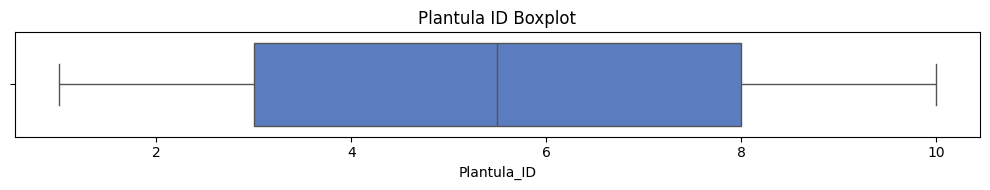


Summary Statistics for Plantula ID:
 count    1200.000000
mean        5.500000
std         2.873479
min         1.000000
25%         3.000000
50%         5.500000
75%         8.000000
max        10.000000
Name: Plantula_ID, dtype: float64


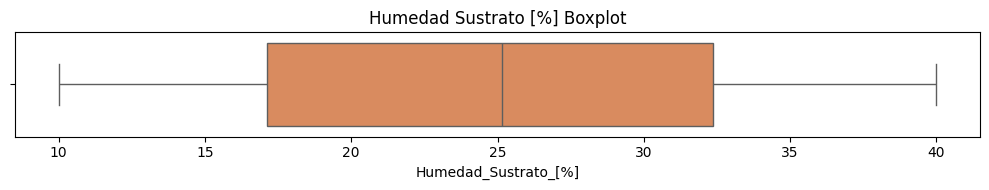


Summary Statistics for Humedad Sustrato [%]:
 count    1200.000000
mean       25.106918
std         8.677725
min        10.000724
25%        17.131893
50%        25.168333
75%        32.370231
max        39.993164
Name: Humedad_Sustrato_[%], dtype: float64


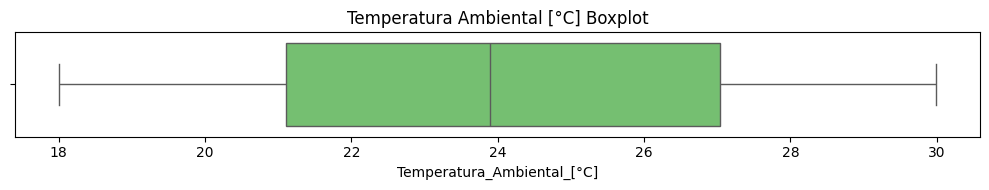


Summary Statistics for Temperatura Ambiental [°C]:
 count    1200.000000
mean       23.999130
std         3.441561
min        18.001993
25%        21.101766
50%        23.889044
75%        27.042634
max        29.990886
Name: Temperatura_Ambiental_[°C], dtype: float64


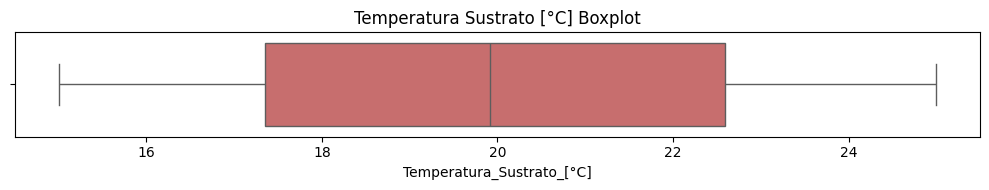


Summary Statistics for Temperatura Sustrato [°C]:
 count    1200.000000
mean       19.957794
std         2.932073
min        15.003710
25%        17.353027
50%        19.911473
75%        22.596851
max        24.995929
Name: Temperatura_Sustrato_[°C], dtype: float64


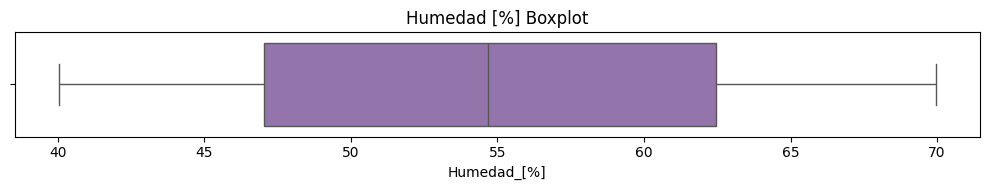


Summary Statistics for Humedad [%]:
 count    1200.000000
mean       54.853165
std         8.784916
min        40.028758
25%        47.019694
50%        54.692069
75%        62.451053
max        69.968871
Name: Humedad_[%], dtype: float64


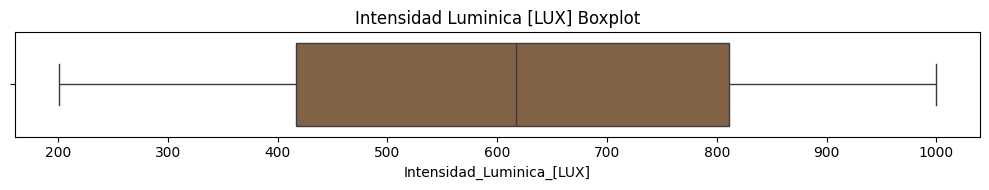


Summary Statistics for Intensidad Luminica [LUX]:
 count    1200.000000
mean      612.637265
std       228.318853
min       200.615482
25%       416.878983
50%       617.240221
75%       811.474690
max       999.856262
Name: Intensidad_Luminica_[LUX], dtype: float64


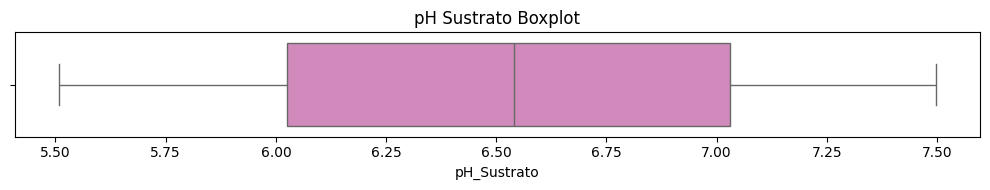


Summary Statistics for pH Sustrato:
 count    1200.000000
mean        6.524102
std         0.581755
min         5.507392
25%         6.026042
50%         6.540524
75%         7.030039
max         7.497823
Name: pH_Sustrato, dtype: float64


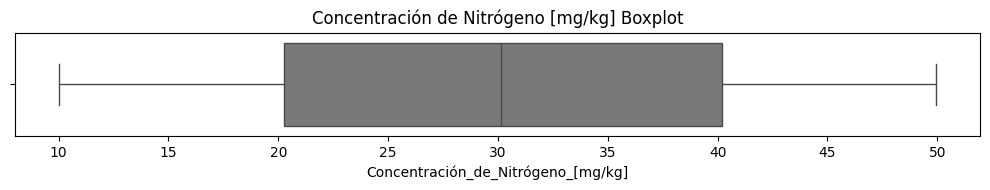


Summary Statistics for Concentración de Nitrógeno [mg/kg]:
 count    1200.000000
mean       30.106751
std        11.514396
min        10.003650
25%        20.249774
50%        30.138590
75%        40.184737
max        49.951136
Name: Concentración_de_Nitrógeno_[mg/kg], dtype: float64


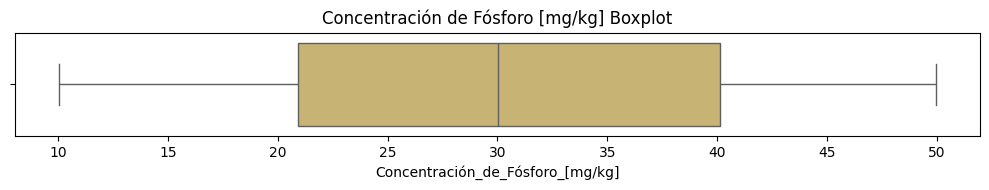


Summary Statistics for Concentración de Fósforo [mg/kg]:
 count    1200.000000
mean       30.264484
std        11.466846
min        10.017690
25%        20.894445
50%        30.019385
75%        40.131459
max        49.980700
Name: Concentración_de_Fósforo_[mg/kg], dtype: float64


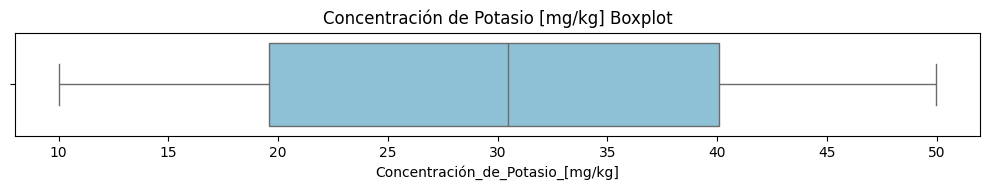


Summary Statistics for Concentración de Potasio [mg/kg]:
 count    1200.000000
mean       30.112088
std        11.668085
min        10.000606
25%        19.585561
50%        30.495054
75%        40.108296
max        49.981945
Name: Concentración_de_Potasio_[mg/kg], dtype: float64


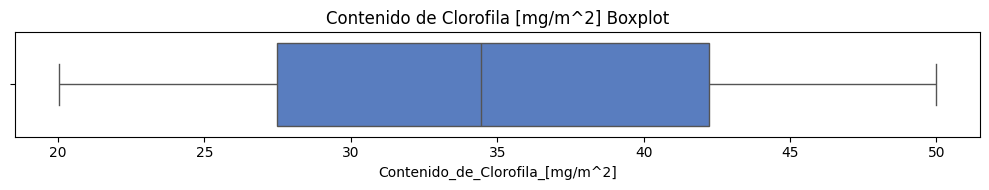


Summary Statistics for Contenido de Clorofila [mg/m^2]:
 count    1200.000000
mean       34.749591
std         8.766995
min        20.025511
25%        27.463350
50%        34.433427
75%        42.232637
max        49.990811
Name: Contenido_de_Clorofila_[mg/m^2], dtype: float64


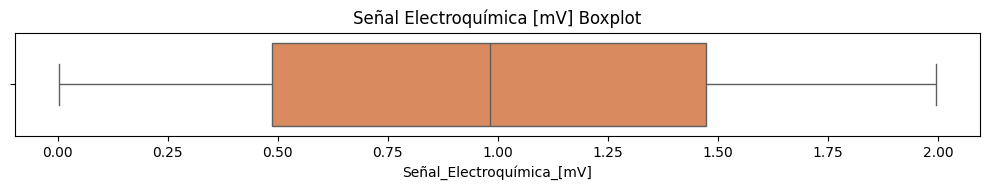


Summary Statistics for Señal Electroquímica [mV]:
 count    1200.000000
mean        0.987764
std         0.575116
min         0.002376
25%         0.487982
50%         0.981647
75%         1.473142
max         1.996116
Name: Señal_Electroquímica_[mV], dtype: float64


In [ ]:
# Función para realizar análisis univariados para columnas numéricas con diagramas de caja y estadísticas
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))

    color = sns.color_palette("muted")[columns_to_analyze.index(column) % len(sns.color_palette("muted"))]

    sns.boxplot(x=data[column], color=color)
    plt.title(f'{title} Boxplot')

    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = [
    'Plantula_ID', 'Humedad_Sustrato_[%]', 'Temperatura_Ambiental_[°C]',
    'Temperatura_Sustrato_[°C]', 'Humedad_[%]', 'Intensidad_Luminica_[LUX]',
    'pH_Sustrato', 'Concentración_de_Nitrógeno_[mg/kg]',
    'Concentración_de_Fósforo_[mg/kg]', 'Concentración_de_Potasio_[mg/kg]',
    'Contenido_de_Clorofila_[mg/m^2]',
    'Señal_Electroquímica_[mV]'
]

# Iterar a través de columnas y realizar análisis univariados
for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

In [ ]:
# Conviertimos la columna de marca de tiempo al formato de fecha y hora
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Creamos una columna que se llamará 'Semana' para agrupar por semana
df['Week'] = df['Timestamp'].dt.to_period('W').apply(lambda r: r.start_time)

# Agregamos el estado de salud de la plantula semanalmente para cada ID
weekly_health_status = (
    df.groupby(['Plantula_ID', 'Week', 'Estado_de_salud_plantula'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

weekly_health_status.columns.name = None
weekly_health_status = weekly_health_status.rename(columns={
    'Estrés alto': 'Estrés_Alto_Count',
    'Estrés moderado': 'Estrés_Moderado_Count',
    'Saludable': 'Saludable_Count'
})

weekly_health_status

Plantula_ID       Week  Estrés_Alto_Count  Estrés_Moderado_Count  \
0             1 2024-09-30                  9                      5   
1             1 2024-10-07                 12                      6   
2             1 2024-10-14                 15                     11   
3             1 2024-10-21                  8                     16   
4             1 2024-10-28                  6                      8   
5             2 2024-09-30                  7                      6   
6             2 2024-10-07                 10                      6   
7             2 2024-10-14                 12                      9   
8             2 2024-10-21                 13                      6   
9             2 2024-10-28                 11                      4   
10            3 2024-09-30                  2                      7   
11            3 2024-10-07                  8                     14   
12            3 2024-10-14                 11                      7   
13            3 2024-10-21                 12                      8   
14            3 2024-10-28                  8                      4   
15            4 2024-09-30                  3                      8   
16            4 2024-10-07                 10                     10   
17            4 2024-10-14                 12                      6   
18            4 2024-10-21                 12                     12   
19            4 2024-10-28                  9                     10   
20            5 2024-09-30                  5                      8   
21            5 2024-10-07                 11                      9   
22            5 2024-10-14                 12                     11   
23            5 2024-10-21                  9                      8   
24            5 2024-10-28                 13                      5   
25            6 2024-09-30                  3                      7   
26            6 2024-10-07                 15                      7   
27            6 2024-10-14                 11                     10   
28            6 2024-10-21                 14                     10   
29            6 2024-10-28                  3                     11   
30            7 2024-09-30                  5                      7   
31            7 2024-10-07                 11                      4   
32            7 2024-10-14                 13                      9   
33            7 2024-10-21                 17                      6   
34            7 2024-10-28                 10                      9   
35            8 2024-09-30                  8                      4   
36            8 2024-10-07                 10                      8   
37            8 2024-10-14                 10                     11   
38            8 2024-10-21                 16                      8   
39            8 2024-10-28                  8                      9   
40            9 2024-09-30                  8                      3   
41            9 2024-10-07                 15                      8   
42            9 2024-10-14                 13                      9   
43            9 2024-10-21                 13                      8   
44            9 2024-10-28                  8                      7   
45           10 2024-09-30                  7                      7   
46           10 2024-10-07                 11                     11   
47           10 2024-10-14                 14                      7   
48           10 2024-10-21                 12                      9   
49           10 2024-10-28                  6                      8   

    Saludable_Count  
0                 1  
1                10  
2                 2  
3                 4  
4                 7  
5                 2  
6                12  
7                 7  
8                 9  
9                 6  
10                6  
11                6  
12               10  
13                8  
1

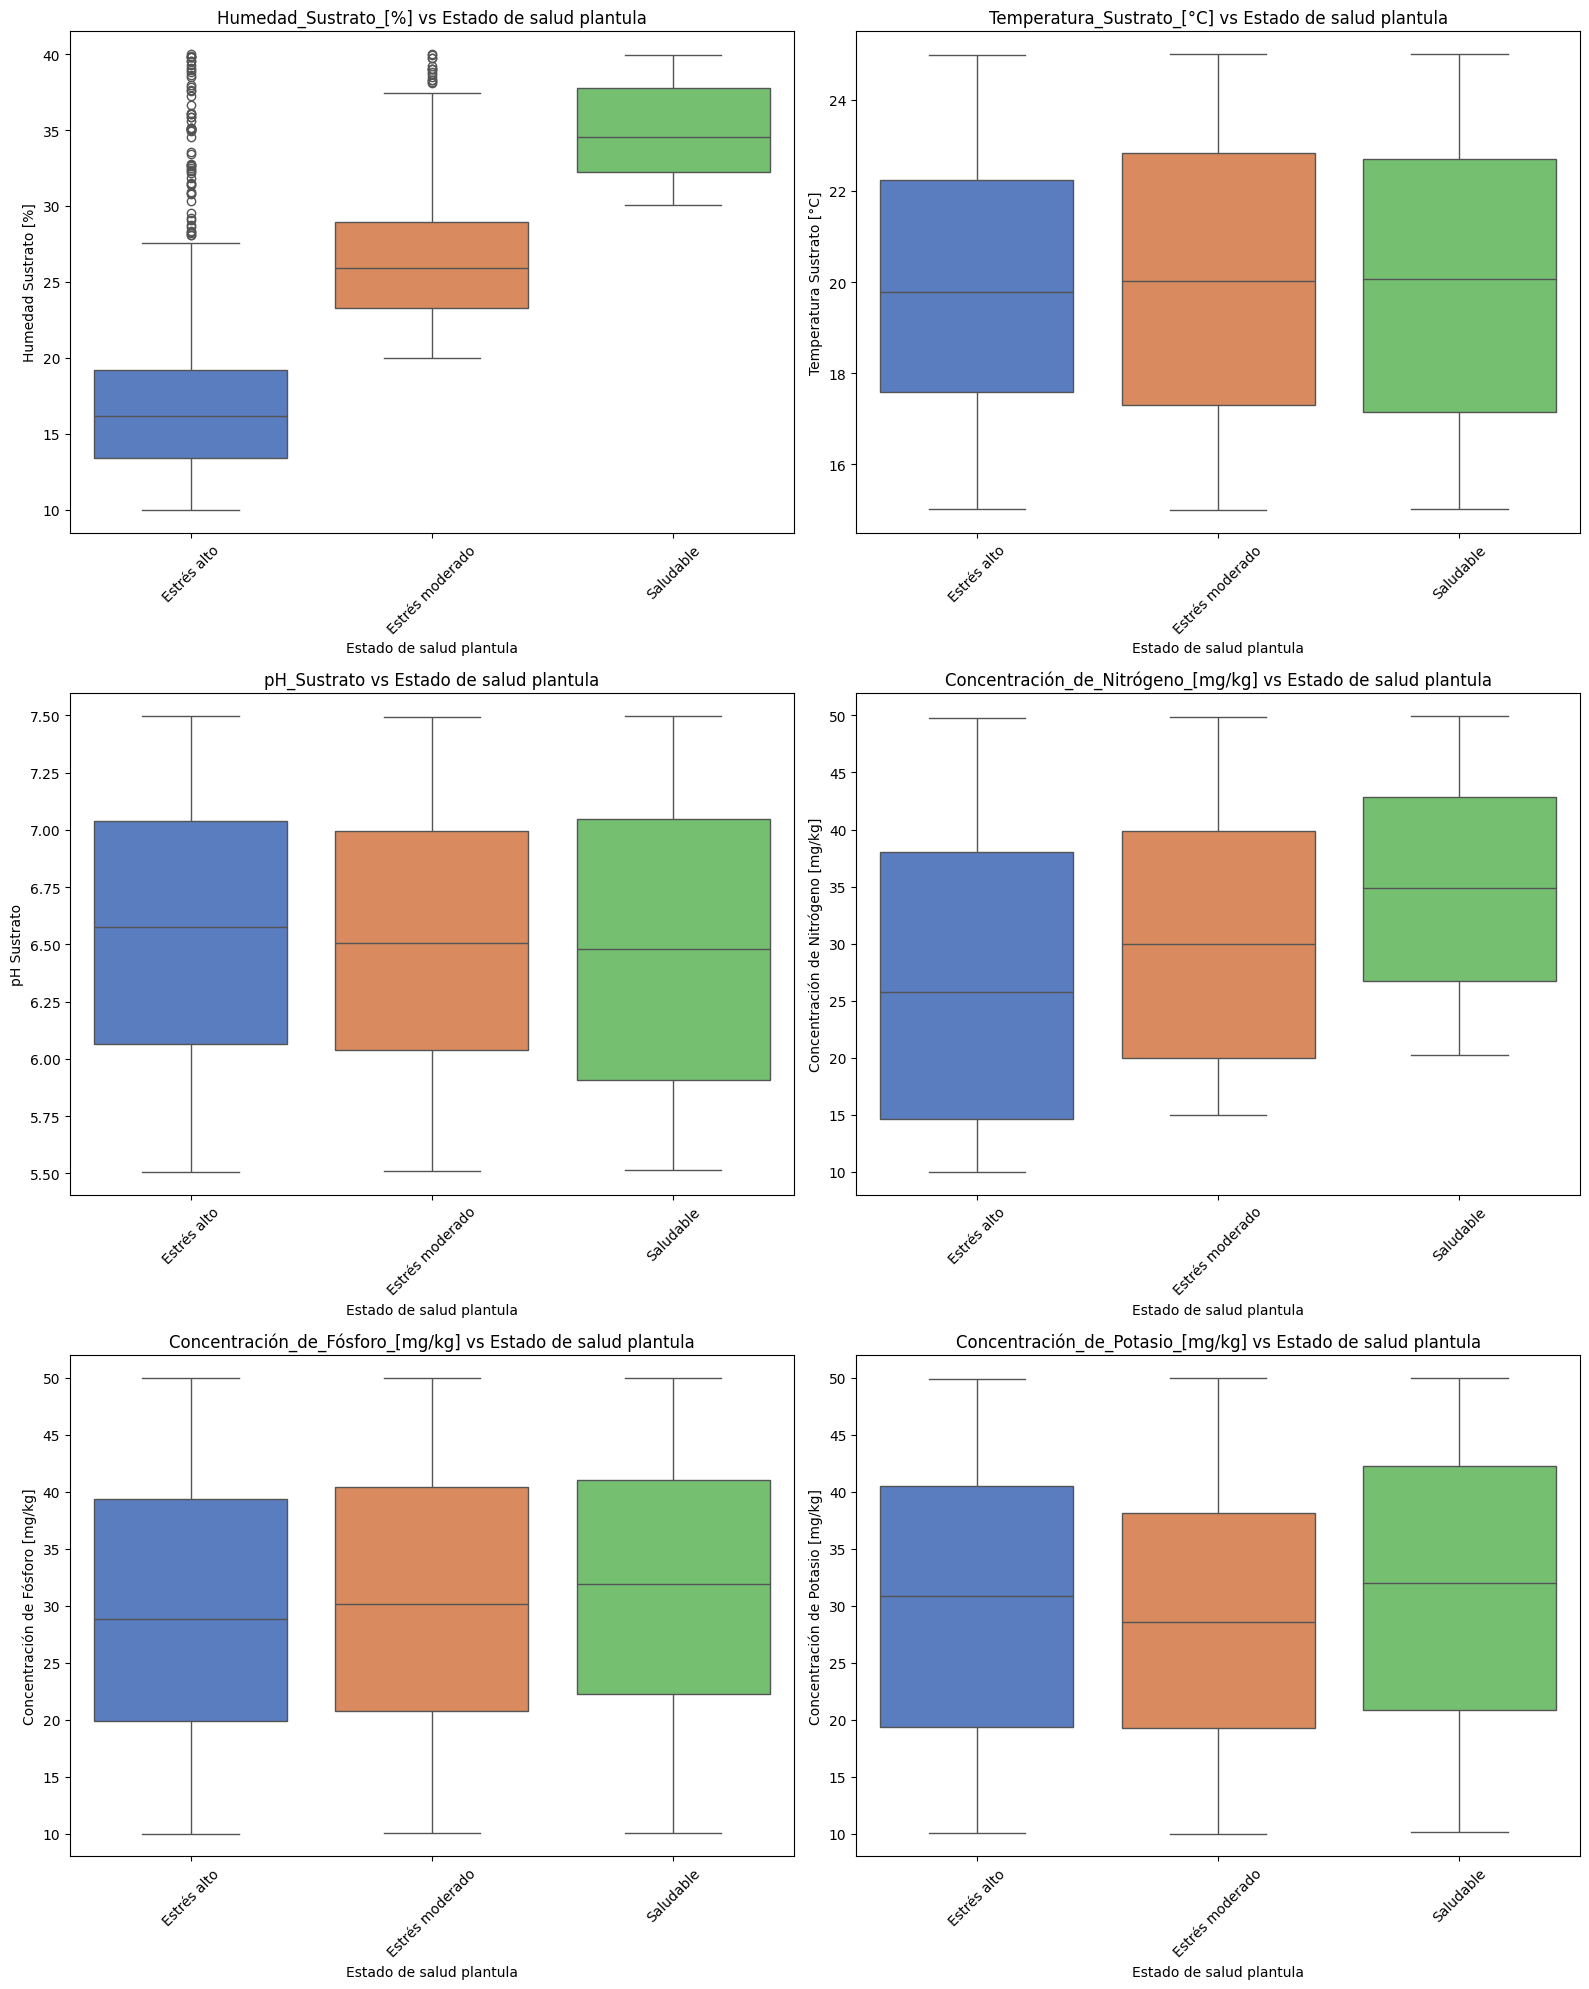

In [ ]:
# Comparar el estado de salud de la planta con las propiedades del sustrato
# Definir las propiedades del sustrato
Sustrato_Propiedades = [
    'Humedad_Sustrato_[%]', 'Temperatura_Sustrato_[°C]', 'pH_Sustrato',
    'Concentración_de_Nitrógeno_[mg/kg]', 'Concentración_de_Fósforo_[mg/kg]', 'Concentración_de_Potasio_[mg/kg]'
]

# Create subplots to visualize the relationship between Plant_Health_Status and soil properties
plt.figure(figsize=(16, 20))
for i, feature in enumerate(Sustrato_Propiedades):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='Estado_de_salud_plantula', y=feature, data=df, palette='muted')
    plt.title(f'{feature} vs Estado de salud plantula')
    plt.xlabel('Estado de salud plantula')
    plt.ylabel(feature.replace('_', ' '))
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

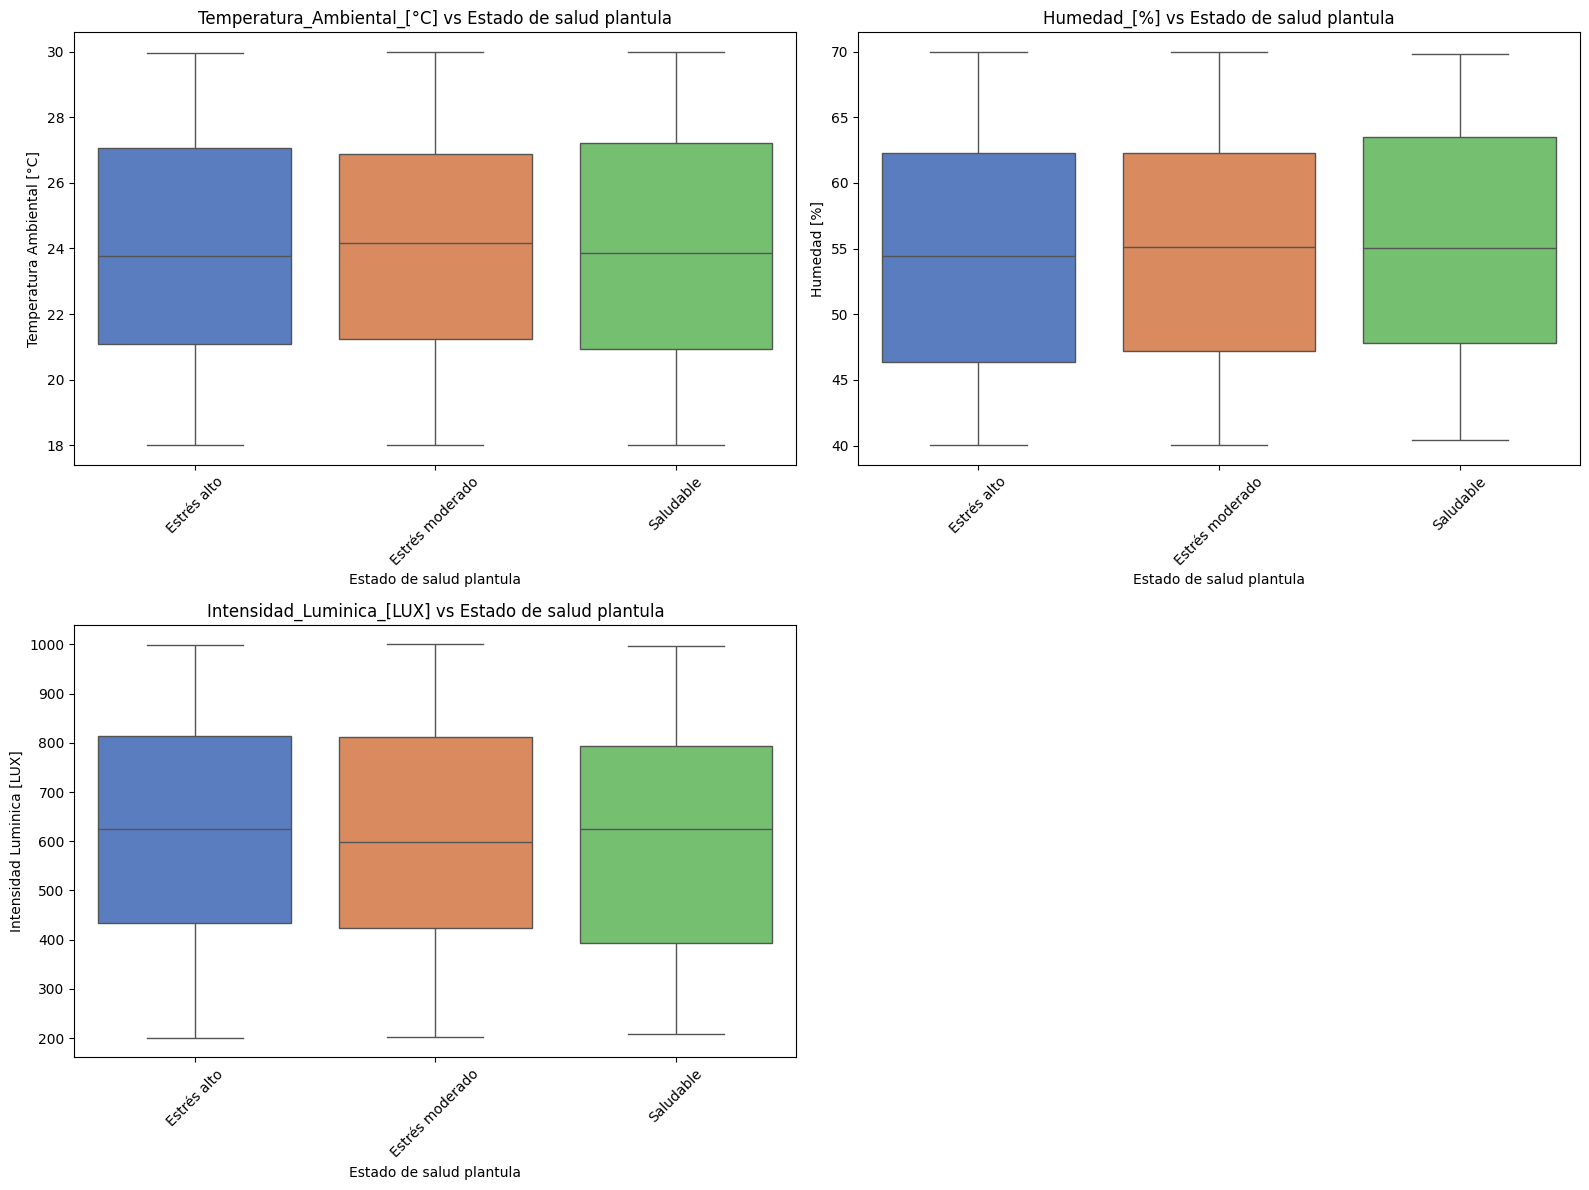

In [ ]:
# Comparar el estado de salud de la planta con las condiciones ambientales
# Definir las características de las condiciones ambientales
environmental_conditions = [
    'Temperatura_Ambiental_[°C]', 'Humedad_[%]', 'Intensidad_Luminica_[LUX]'
]

# Create subplots to visualize the relationship between Plant_Health_Status and environmental conditions
plt.figure(figsize=(16, 12))
for i, feature in enumerate(environmental_conditions):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Estado_de_salud_plantula', y=feature, data=df, palette='muted')
    plt.title(f'{feature} vs Estado de salud plantula')
    plt.xlabel('Estado de salud plantula')
    plt.ylabel(feature.replace('_', ' '))
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

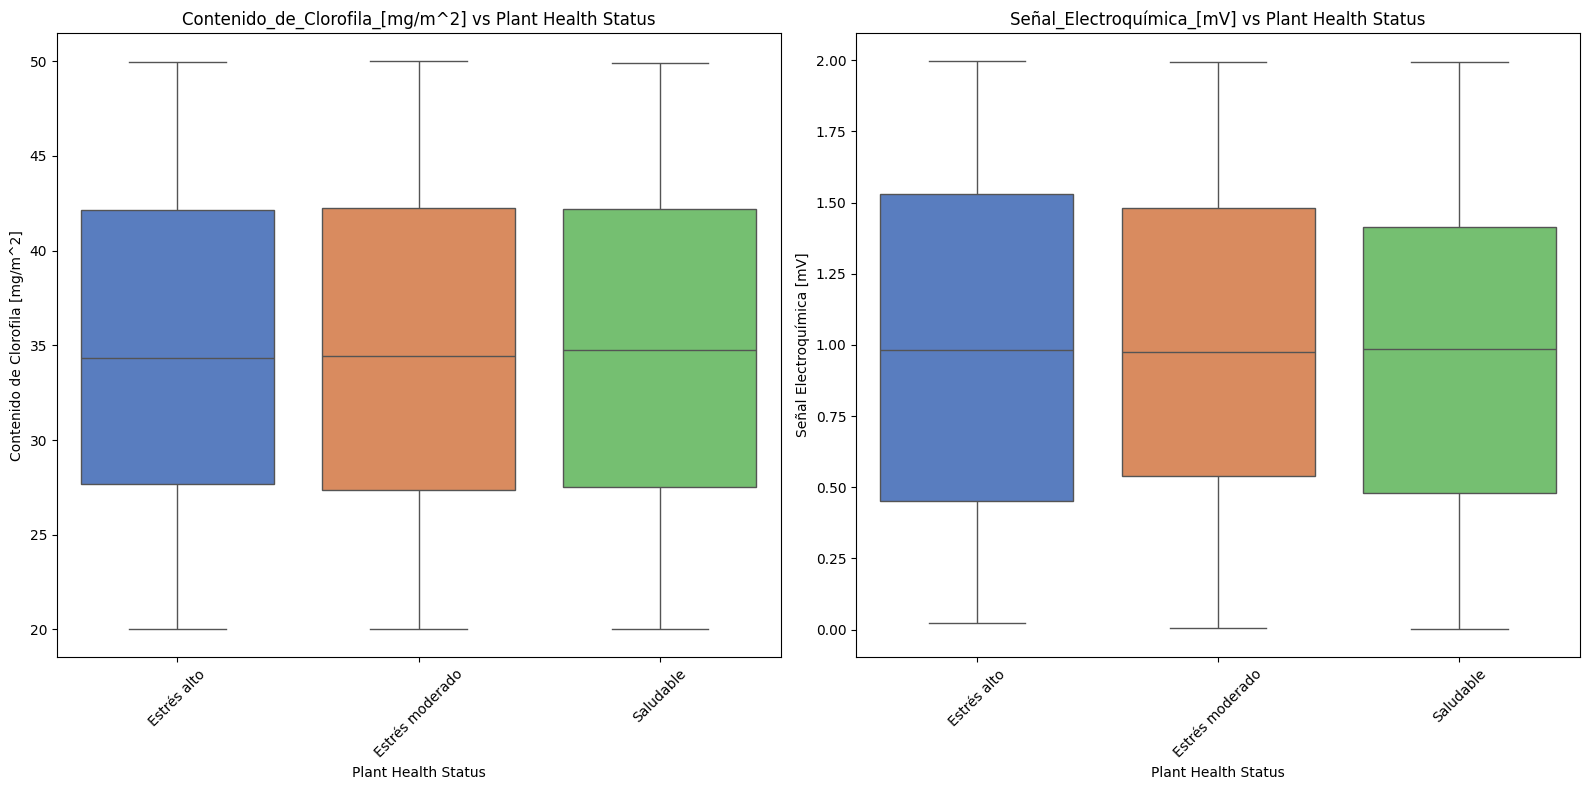

In [ ]:
# Comparar el estado de salud de las plantas con los indicadores de salud de las plantas

# Definir las características de los indicadores de salud de las plantas

health_indicators = [
    'Contenido_de_Clorofila_[mg/m^2]', 'Señal_Electroquímica_[mV]'
]

# Create subplots to visualize the relationship between Plant_Health_Status and plant health indicators
plt.figure(figsize=(16, 8))
for i, feature in enumerate(health_indicators):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x='Estado_de_salud_plantula', y=feature, data=df, palette='muted')
    plt.title(f'{feature} vs Plant Health Status')
    plt.xlabel('Plant Health Status')
    plt.ylabel(feature.replace('_', ' '))
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

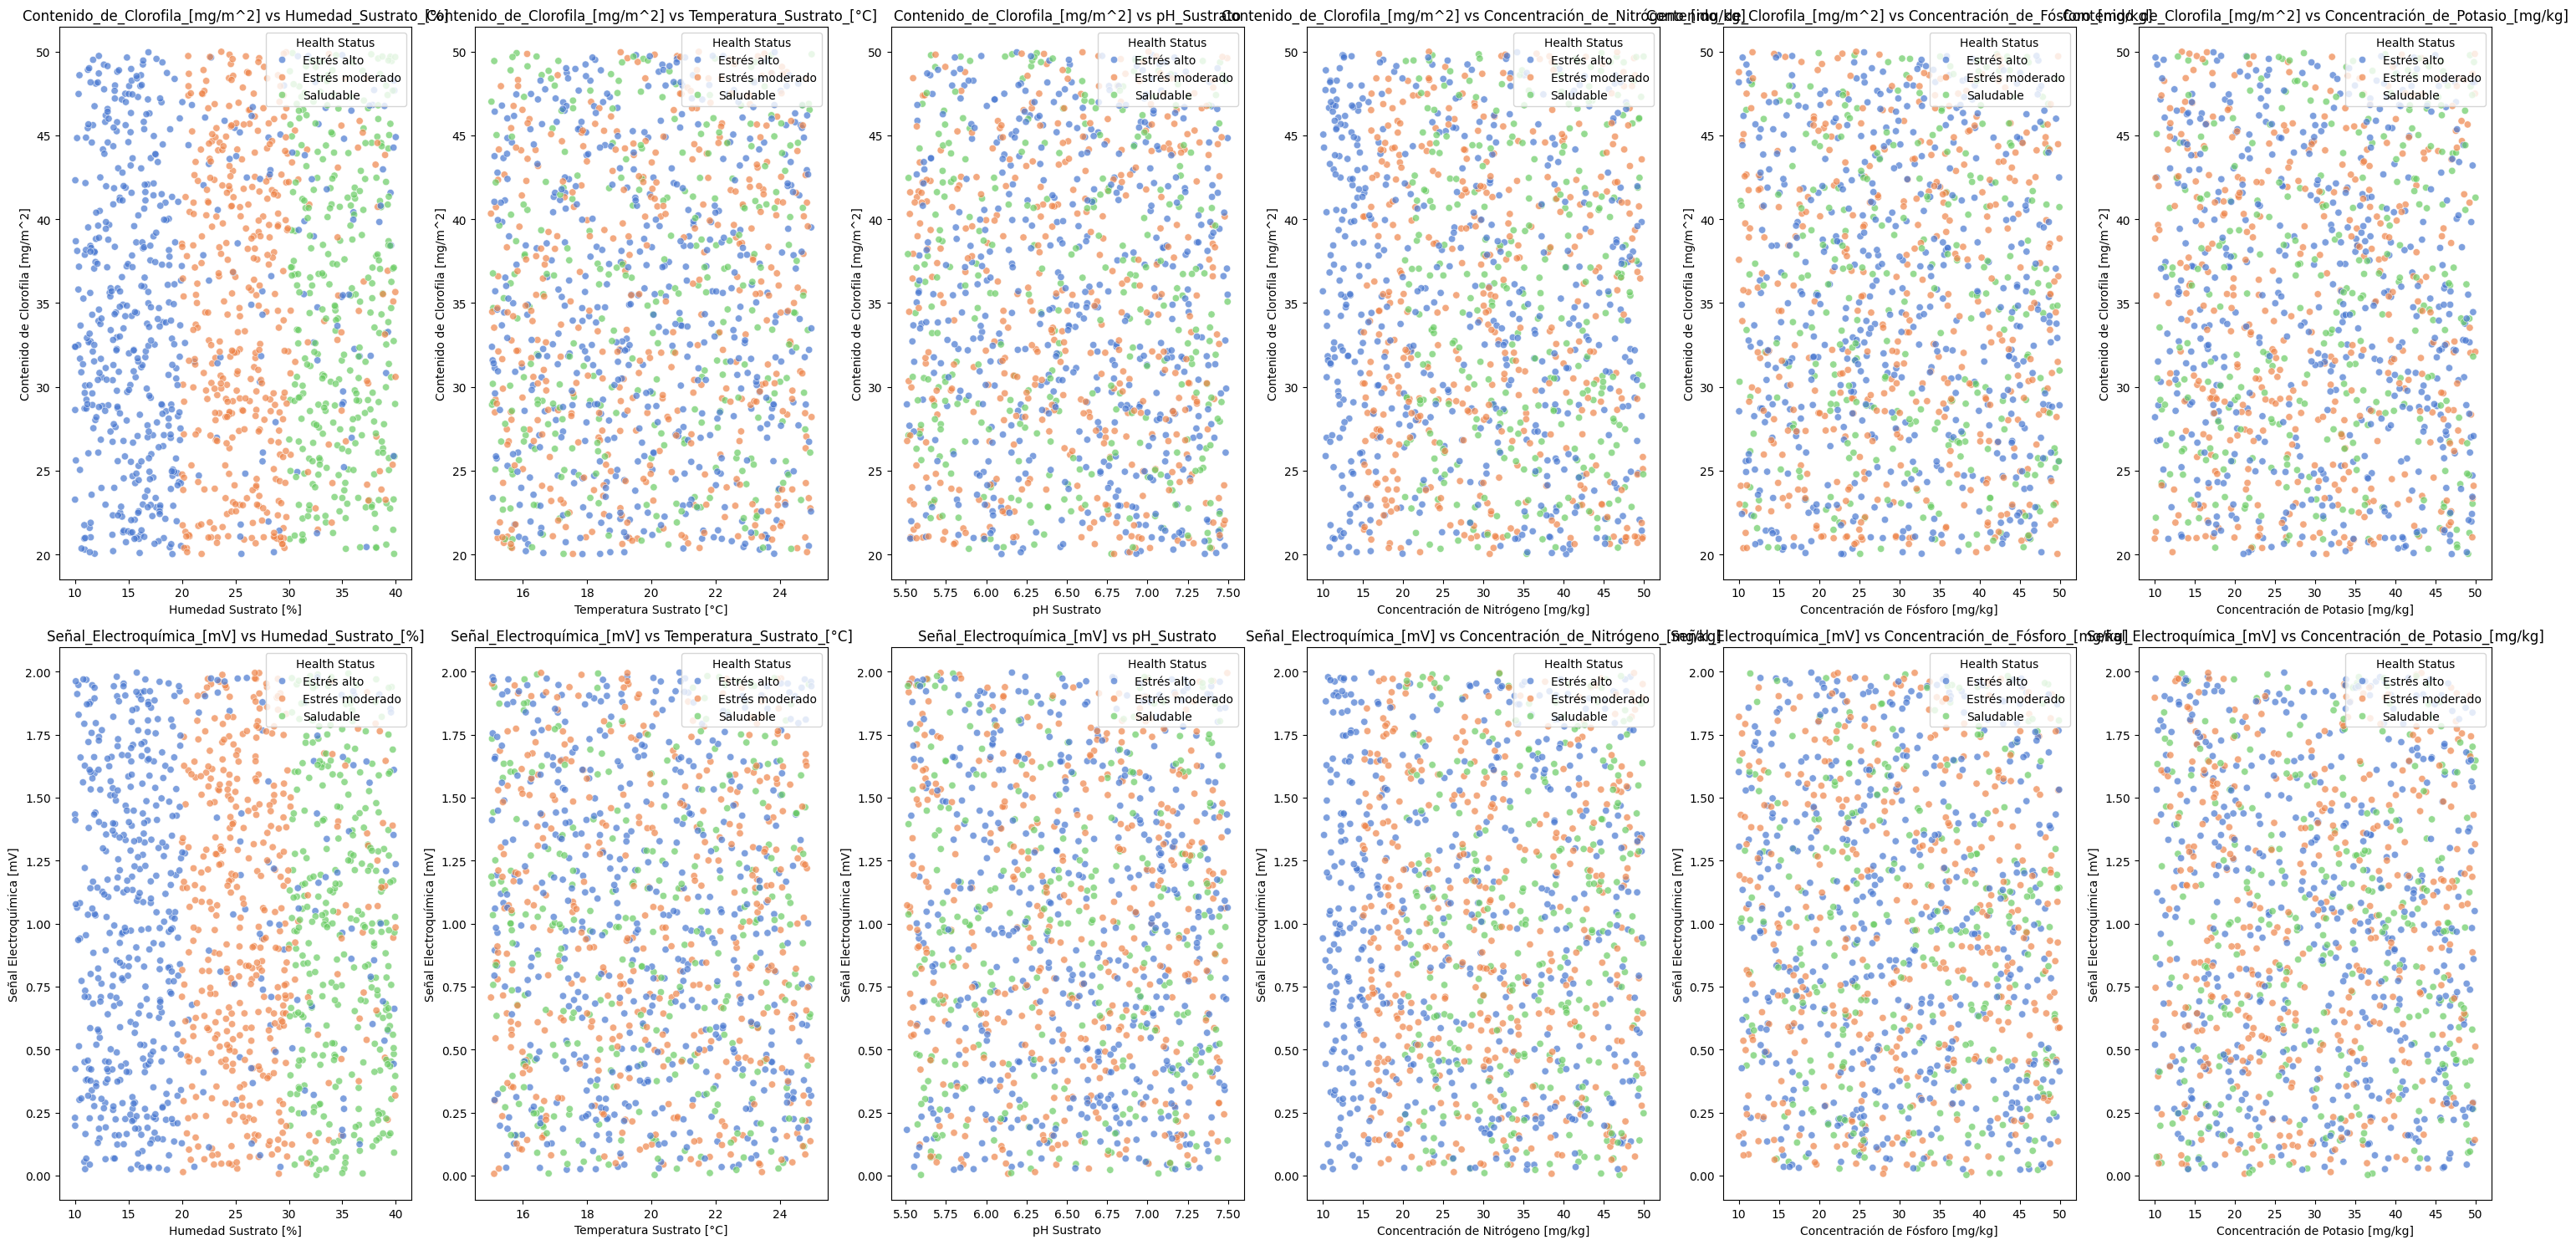

In [ ]:
# Comparar el estado de salud de la planta con los indicadores de salud de la planta y las propiedades del sustrato mediante diagramas de dispersión

# Definir las propiedades del sustrato y los indicadores de salud de la planta
soil_properties = [
    'Humedad_Sustrato_[%]', 'Temperatura_Sustrato_[°C]', 'pH_Sustrato',
    'Concentración_de_Nitrógeno_[mg/kg]', 'Concentración_de_Fósforo_[mg/kg]', 'Concentración_de_Potasio_[mg/kg]'
]

health_indicators = [
    'Contenido_de_Clorofila_[mg/m^2]', 'Señal_Electroquímica_[mV]'
]

# Create scatter plots for each combination of plant health indicators and soil properties
plt.figure(figsize=(30, 15))
plot_index = 1

for health_indicator in health_indicators:
    for soil_property in soil_properties:
        plt.subplot(len(health_indicators), len(soil_properties), plot_index)
        sns.scatterplot(
            x=soil_property,
            y=health_indicator,
            hue='Estado_de_salud_plantula',
            data=df,
            palette='muted',
            alpha=0.7
        )
        plt.title(f'{health_indicator} vs {soil_property}')
        plt.xlabel(soil_property.replace('_', ' '))
        plt.ylabel(health_indicator.replace('_', ' '))
        plt.legend(title='Health Status', loc='upper right')
        plot_index += 1

plt.tight_layout()
plt.show()

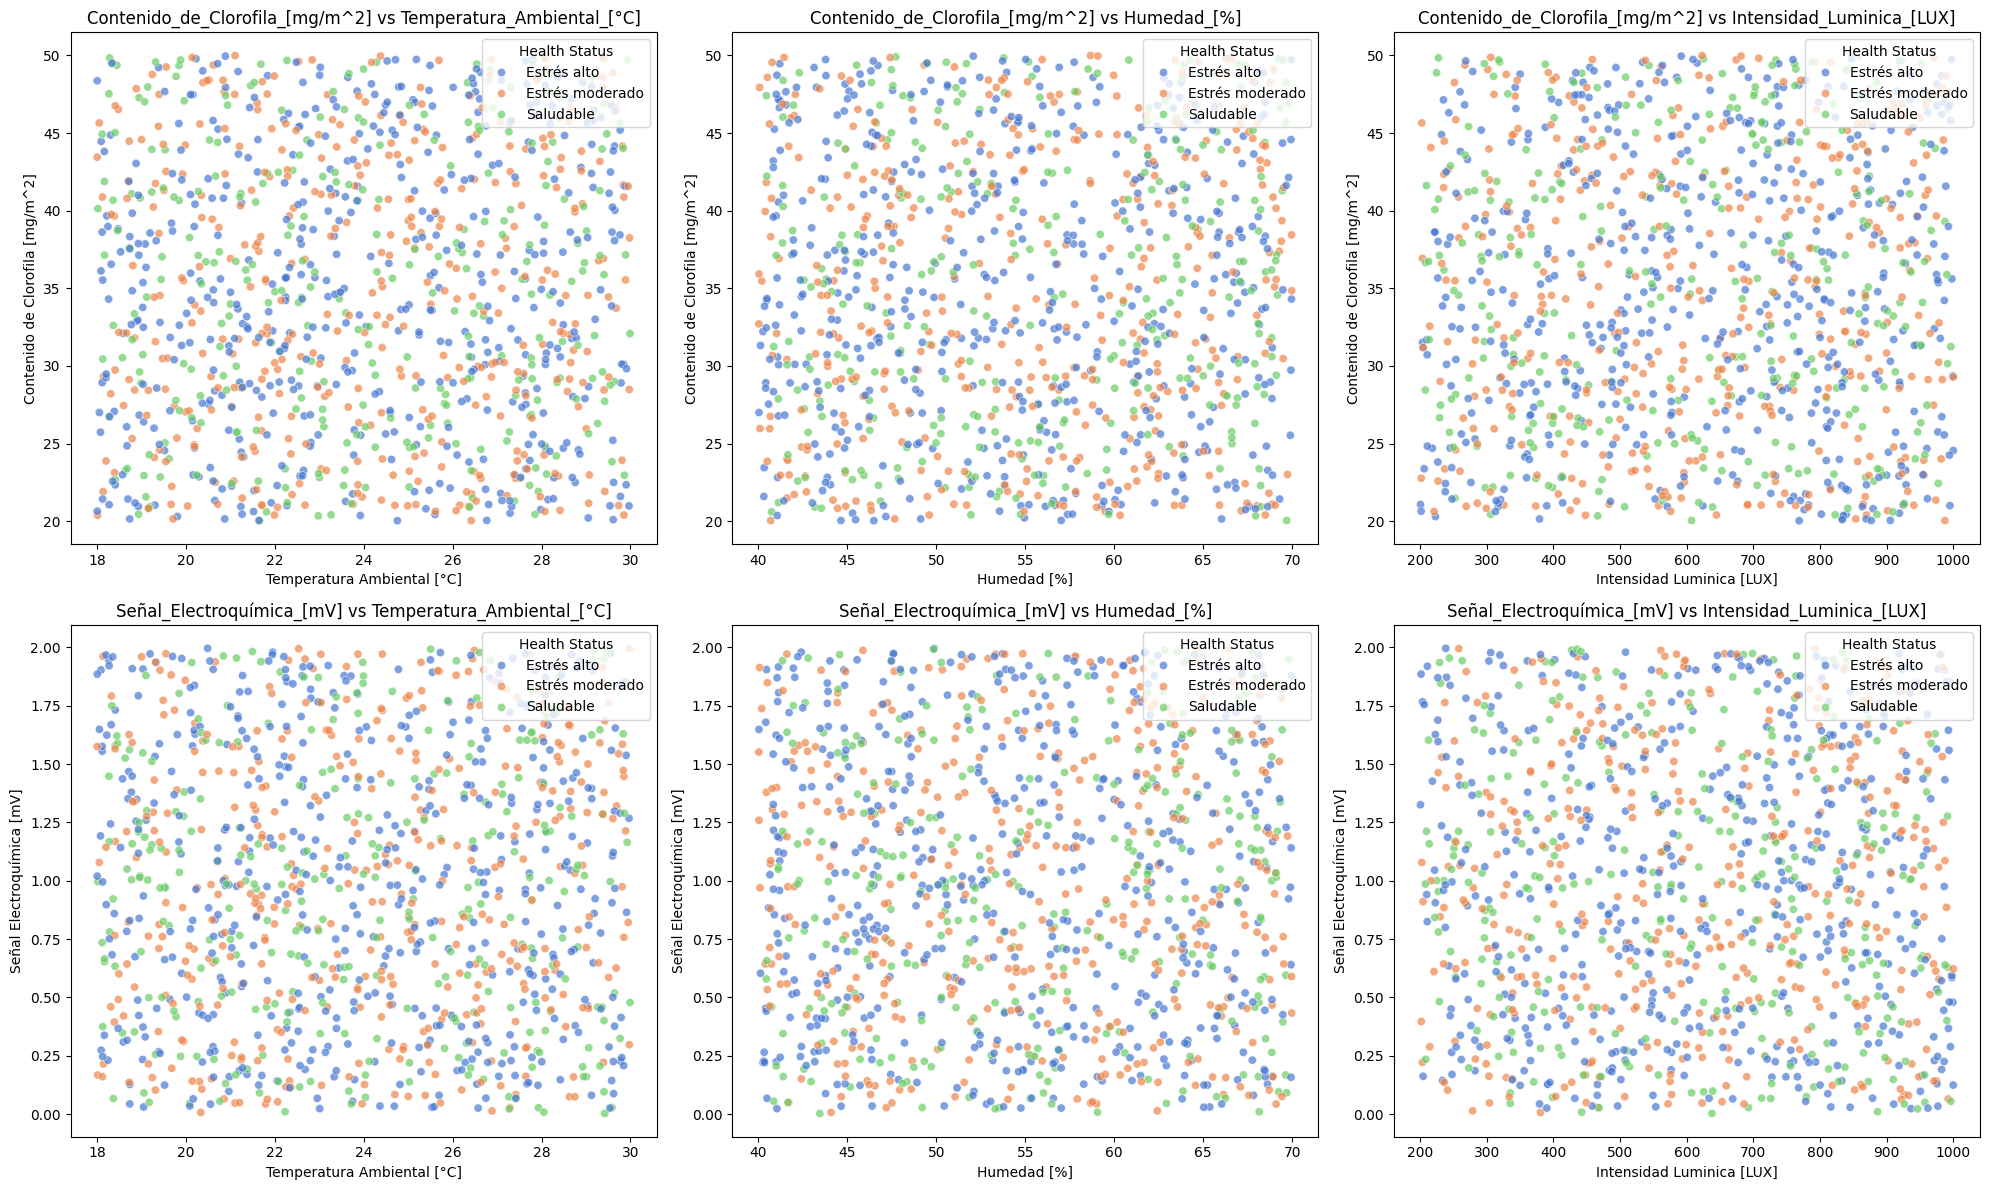

In [ ]:
# Comparar el estado de salud de las plantas con los indicadores de salud de las plantas y las condiciones ambientales mediante diagramas de dispersión

# Definir las condiciones ambientales y los indicadores de salud de las plantas

environmental_conditions = [
    'Temperatura_Ambiental_[°C]', 'Humedad_[%]', 'Intensidad_Luminica_[LUX]'
]

health_indicators = [
    'Contenido_de_Clorofila_[mg/m^2]', 'Señal_Electroquímica_[mV]'
]

# Create scatter plots for each combination of plant health indicators and environmental conditions
plt.figure(figsize=(20, 12))
plot_index = 1

for health_indicator in health_indicators:
    for env_condition in environmental_conditions:
        plt.subplot(len(health_indicators), len(environmental_conditions), plot_index)
        sns.scatterplot(
            x=env_condition,
            y=health_indicator,
            hue='Estado_de_salud_plantula',
            data=df,
            palette='muted',
            alpha=0.7
        )
        plt.title(f'{health_indicator} vs {env_condition}')
        plt.xlabel(env_condition.replace('_', ' '))
        plt.ylabel(health_indicator.replace('_', ' '))
        plt.legend(title='Health Status', loc='upper right')
        plot_index += 1

plt.tight_layout()
plt.show()

In [ ]:
# Explorar las relaciones entre el estado de salud de las plantas, los indicadores de salud de las plantas y las condiciones ambientales

# Agrupar los datos por estado de salud de las plantas y calcular los valores medios
status_analysis_mean = df.groupby('Estado_de_salud_plantula')[
    ['Contenido_de_Clorofila_[mg/m^2]', 'Señal_Electroquímica_[mV]', 'Temperatura_Ambiental_[°C]', 'Humedad_[%]', 'Intensidad_Luminica_[LUX]']
].mean()

# Group data by Plant_Health_Status and calculate standard deviation
status_analysis_std = df.groupby('Estado_de_salud_plantula')[
    ['Contenido_de_Clorofila_[mg/m^2]', 'Señal_Electroquímica_[mV]', 'Temperatura_Ambiental_[°C]', 'Humedad_[%]', 'Intensidad_Luminica_[LUX]']
].std()

# Displaying the mean values table
print("----- Mean Values by Plant Health Status -----")
display(status_analysis_mean)

# Displaying the standard deviation table
print("\n----- Standard Deviation by Plant Health Status -----")
display(status_analysis_std)

----- Mean Values by Plant Health Status -----


Contenido_de_Clorofila_[mg/m^2]  \
Estado_de_salud_plantula                                    
Estrés alto                                     34.772673   
Estrés moderado                                 34.574290   
Saludable                                       34.946676   

                          Señal_Electroquímica_[mV]  \
Estado_de_salud_plantula                              
Estrés alto                                0.999215   
Estrés moderado                            0.992261   
Saludable                                  0.962461   

                          Temperatura_Ambiental_[°C]  Humedad_[%]  \
Estado_de_salud_plantula                                            
Estrés alto                                23.986899    54.400621   
Estrés moderado                            24.053344    55.033708   
Saludable                                  23.946740    55.371040   

                          Intensidad_Luminica_[LUX]  
Estado_de_salud_plantula                             
Estrés alto                              619.407110  
Estrés moderado                          611.957444  
Saludable                                602.170541


----- Standard Deviation by Plant Health Status -----


Contenido_de_Clorofila_[mg/m^2]  \
Estado_de_salud_plantula                                    
Estrés alto                                      8.729186   
Estrés moderado                                  8.825872   
Saludable                                        8.775821   

                          Señal_Electroquímica_[mV]  \
Estado_de_salud_plantula                              
Estrés alto                                0.589959   
Estrés moderado                            0.565840   
Saludable                                  0.563235   

                          Temperatura_Ambiental_[°C]  Humedad_[%]  \
Estado_de_salud_plantula                                            
Estrés alto                                 3.461436     8.822416   
Estrés moderado                             3.358229     8.714393   
Saludable                                   3.528359     8.808313   

                          Intensidad_Luminica_[LUX]  
Estado_de_salud_plantula                             
Estrés alto                              229.650011  
Estrés moderado                          225.993280  
Saludable                                229.541534

In [ ]:
# Explorar las relaciones entre el estado de salud de la planta y las propiedades del sustrato

# Agrupar los datos según el estado de salud de la planta y calcular los valores medios de las propiedades del sustrato

substrate_properties = [
    'Humedad_Sustrato_[%]', 'Temperatura_Sustrato_[°C]', 'pH_Sustrato',
    'Concentración_de_Nitrógeno_[mg/kg]', 'Concentración_de_Fósforo_[mg/kg]', 'Concentración_de_Potasio_[mg/kg]'
]

Substrate_mean = df.groupby('Estado_de_salud_plantula')[substrate_properties].mean()
Substrate_std = df.groupby('Estado_de_salud_plantula')[substrate_properties].std()

# Displaying the mean values table
print("----- Mean Substrate Properties by Plant Health Status -----")
display(Substrate_mean)

# Displaying the standard deviation table
print("\n----- Standard Deviation of Substrate Properties by Plant Health Status -----")
display(Substrate_std)

----- Mean Substrate Properties by Plant Health Status -----


Humedad_Sustrato_[%]  Temperatura_Sustrato_[°C]  \
Estado_de_salud_plantula                                                    
Estrés alto                          18.127362                  19.883735   
Estrés moderado                      26.556399                  20.065495   
Saludable                            34.890527                  19.937377   

                          pH_Sustrato  Concentración_de_Nitrógeno_[mg/kg]  \
Estado_de_salud_plantula                                                    
Estrés alto                  6.555112                           27.003449   
Estrés moderado              6.503080                           30.522234   
Saludable                    6.500256                           34.764956   

                          Concentración_de_Fósforo_[mg/kg]  \
Estado_de_salud_plantula                                     
Estrés alto                                      29.626528   
Estrés moderado                                  30.174161   
Saludable                                        31.458563   

                          Concentración_de_Potasio_[mg/kg]  
Estado_de_salud_plantula                                    
Estrés alto                                      30.277334  
Estrés moderado                                  29.079865  
Saludable                                        31.223275


----- Standard Deviation of Substrate Properties by Plant Health Status -----


Humedad_Sustrato_[%]  Temperatura_Sustrato_[°C]  \
Estado_de_salud_plantula                                                    
Estrés alto                           7.175815                   2.815933   
Estrés moderado                       4.484009                   3.018390   
Saludable                             3.030107                   3.010269   

                          pH_Sustrato  Concentración_de_Nitrógeno_[mg/kg]  \
Estado_de_salud_plantula                                                    
Estrés alto                  0.562356                           12.500855   
Estrés moderado              0.583169                           10.731781   
Saludable                    0.610800                            8.876348   

                          Concentración_de_Fósforo_[mg/kg]  \
Estado_de_salud_plantula                                     
Estrés alto                                      11.405425   
Estrés moderado                                  11.603479   
Saludable                                        11.329852   

                          Concentración_de_Potasio_[mg/kg]  
Estado_de_salud_plantula                                    
Estrés alto                                      11.775496  
Estrés moderado                                  11.434136  
Saludable                                        11.720809

In [ ]:
# Definimos los niveles de nutrientes
nutrient_levels = ['Concentración_de_Nitrógeno_[mg/kg]', 'Concentración_de_Fósforo_[mg/kg]', 'Concentración_de_Potasio_[mg/kg]']

# Group data by Plant_ID and calculate mean nutrient levels
nutrient_mean = df.groupby('Plantula_ID')[nutrient_levels].mean()

# Group data by Plant_ID and calculate standard deviation for nutrient levels
nutrient_std = df.groupby('Plantula_ID')[nutrient_levels].std()

# Displaying the mean values table
print("------ Mean Nutrient Levels by Plant ID ------")
display(nutrient_mean)

# Displaying the standard deviation table
print("\n------ Standard Deviation of Nutrient Levels by Plant ID ------")
display(nutrient_std)

------ Mean Nutrient Levels by Plant ID ------


Concentración_de_Nitrógeno_[mg/kg]  \
Plantula_ID                                       
1                                     29.761486   
2                                     28.458170   
3                                     33.025237   
4                                     31.403253   
5                                     29.721001   
6                                     30.427030   
7                                     30.276242   
8                                     28.580179   
9                                     28.053085   
10                                    31.361825   

             Concentración_de_Fósforo_[mg/kg]  \
Plantula_ID                                     
1                                   29.601361   
2                                   30.290851   
3                                   31.310906   
4                                   29.720834   
5                                   31.588166   
6                                   30.665480   
7                                   28.960565   
8                                   30.897791   
9                                   30.090007   
10                                  29.518879   

             Concentración_de_Potasio_[mg/kg]  
Plantula_ID                                    
1                                   28.654783  
2                                   29.173003  
3                                   31.307623  
4                                   30.535611  
5                                   29.958471  
6                                   31.047798  
7                                   30.598074  
8                                   30.504378  
9                                   28.981477  
10                                  30.359666


------ Standard Deviation of Nutrient Levels by Plant ID ------


Concentración_de_Nitrógeno_[mg/kg]  \
Plantula_ID                                       
1                                     11.951396   
2                                     11.628727   
3                                     11.594552   
4                                     11.297986   
5                                     11.427841   
6                                     10.437677   
7                                     11.896318   
8                                     11.629557   
9                                     11.358104   
10                                    11.347418   

             Concentración_de_Fósforo_[mg/kg]  \
Plantula_ID                                     
1                                   10.986769   
2                                   11.846966   
3                                   11.388140   
4                                   11.398574   
5                                   11.672393   
6                                   11.530620   
7                                   11.681914   
8                                   11.112014   
9                                   12.381362   
10                                  10.734315   

             Concentración_de_Potasio_[mg/kg]  
Plantula_ID                                    
1                                   10.908984  
2                                   11.615576  
3                                   11.764270  
4                                   11.056780  
5                                   11.750072  
6                                   12.216209  
7                                   11.943484  
8                                   12.064682  
9                                   11.887946  
10                                  11.533869

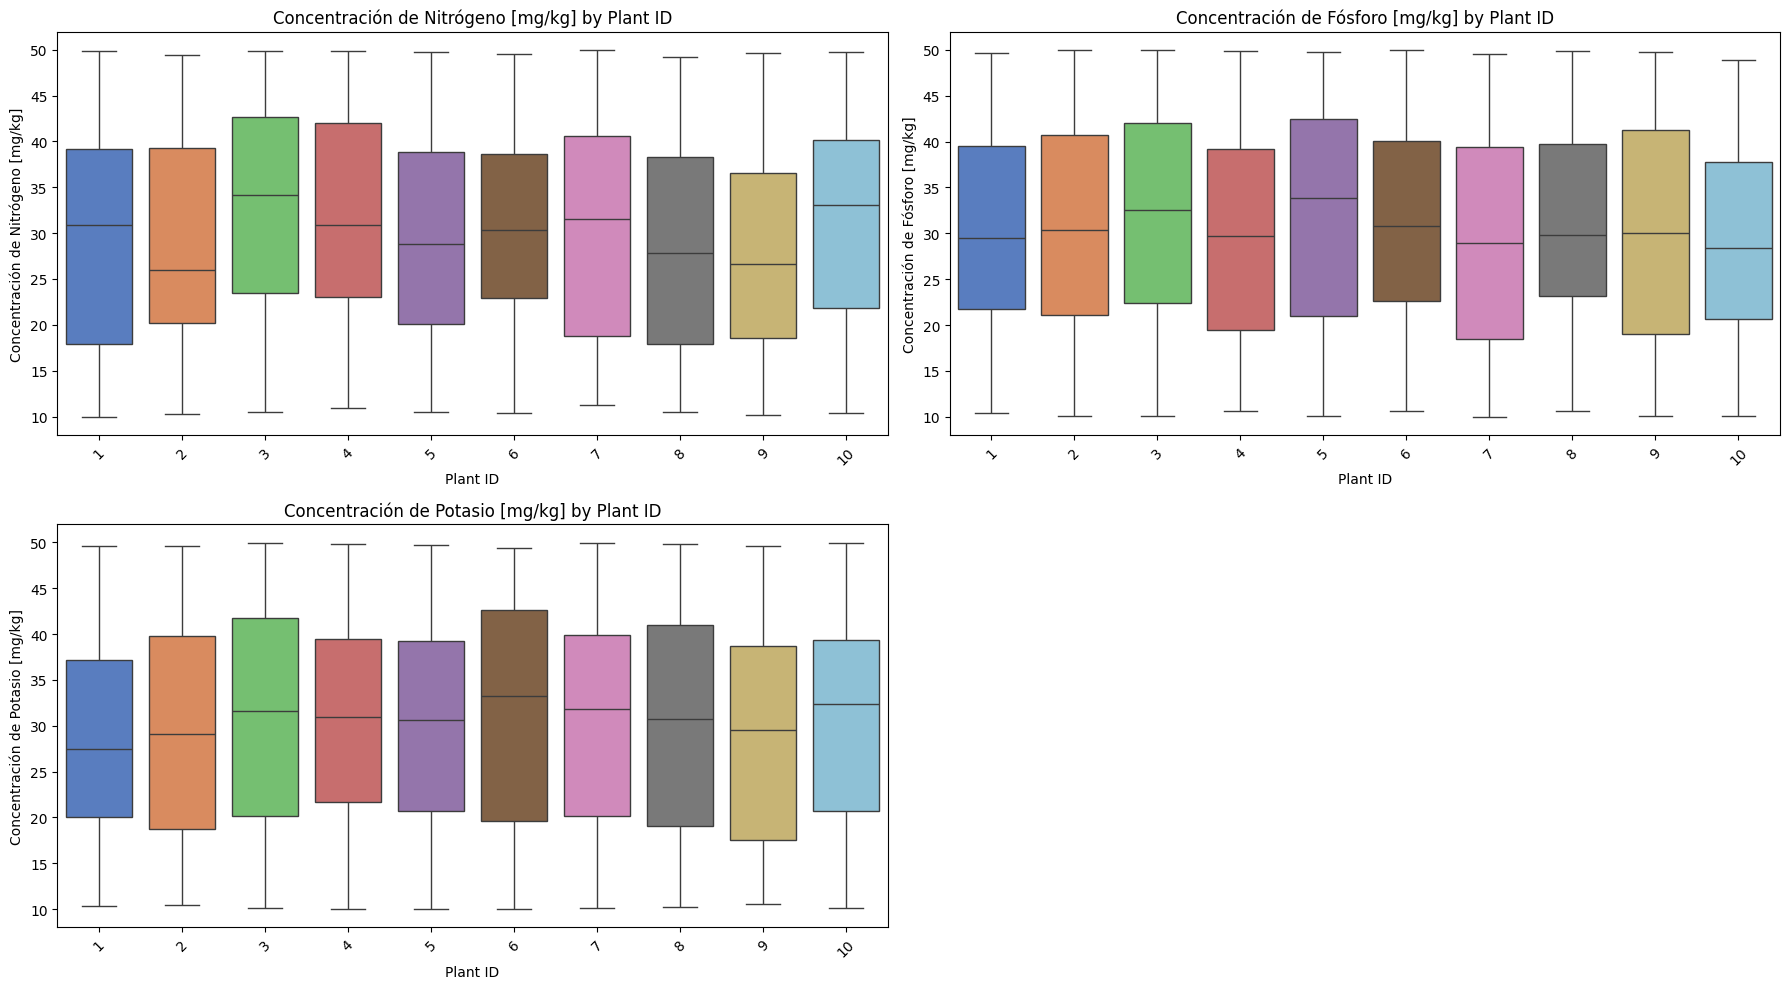

In [ ]:
# Define niveles de nutrientes
nutrients = ['Concentración_de_Nitrógeno_[mg/kg]', 'Concentración_de_Fósforo_[mg/kg]', 'Concentración_de_Potasio_[mg/kg]']

# Graficamos
plt.figure(figsize=(18, 10))

for i, nutrient in enumerate(nutrients):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Plantula_ID', y=nutrient, data=df, palette='muted')
    plt.title(f'{nutrient.replace("_", " ")} by Plant ID')
    plt.xlabel('Plant ID')
    plt.ylabel(nutrient.replace('_', ' '))
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Calcular los niveles medios de nutrientes por ID de la planta y estado de salud de la planta
nutrient_status_mean = df.groupby(['Plantula_ID', 'Estado_de_salud_plantula'])[
    ['Concentración_de_Nitrógeno_[mg/kg]', 'Concentración_de_Fósforo_[mg/kg]', 'Concentración_de_Potasio_[mg/kg]']
].mean().reset_index()

# Separate the nutrient status mean table into three based on Plant_Health_Status
nutrient_high_stress = nutrient_status_mean[nutrient_status_mean['Estado_de_salud_plantula'] == 'Estrés alto']
nutrient_moderate_stress = nutrient_status_mean[nutrient_status_mean['Estado_de_salud_plantula'] == 'Estrés moderado']
nutrient_healthy = nutrient_status_mean[nutrient_status_mean['Estado_de_salud_plantula'] == 'Saludable']

# Display the three tables to the user
print("----- Nutrient Levels for High Stress Plants -----")
display(nutrient_high_stress)

print("\n----- Nutrient Levels for Moderate Stress Plants -----")
display(nutrient_moderate_stress)

print("\n----- Nutrient Levels for Healthy Plants -----")
display(nutrient_healthy)

----- Nutrient Levels for High Stress Plants -----


Plantula_ID Estado_de_salud_plantula  Concentración_de_Nitrógeno_[mg/kg]  \
0             1              Estrés alto                           25.782419   
3             2              Estrés alto                           25.632629   
6             3              Estrés alto                           29.238585   
9             4              Estrés alto                           28.592522   
12            5              Estrés alto                           29.099439   
15            6              Estrés alto                           28.311847   
18            7              Estrés alto                           25.736067   
21            8              Estrés alto                           26.034050   
24            9              Estrés alto                           24.441075   
27           10              Estrés alto                           28.431825   

    Concentración_de_Fósforo_[mg/kg]  Concentración_de_Potasio_[mg/kg]  
0                          28.749032                         29.472459  
3                          29.334914                         30.038894  
6                          31.284210                         30.403602  
9                          29.799930                         30.978085  
12                         31.907226                         31.913175  
15                         28.162508                         30.457481  
18                         26.856122                         30.607080  
21                         30.700334                         29.147110  
24                         30.135068                         30.001101  
27                         29.766865                         29.906171


----- Nutrient Levels for Moderate Stress Plants -----


Plantula_ID Estado_de_salud_plantula  Concentración_de_Nitrógeno_[mg/kg]  \
1             1          Estrés moderado                           30.195361   
4             2          Estrés moderado                           30.058320   
7             3          Estrés moderado                           33.702120   
10            4          Estrés moderado                           31.641916   
13            5          Estrés moderado                           29.016512   
16            6          Estrés moderado                           29.973616   
19            7          Estrés moderado                           30.666419   
22            8          Estrés moderado                           27.244773   
25            9          Estrés moderado                           30.596865   
28           10          Estrés moderado                           31.964593   

    Concentración_de_Fósforo_[mg/kg]  Concentración_de_Potasio_[mg/kg]  
1                          30.272306                         27.734632  
4                          28.154977                         26.682910  
7                          31.564693                         29.639307  
10                         29.941019                         29.387424  
13                         28.970409                         27.670648  
16                         31.448612                         30.427912  
19                         33.347397                         30.820548  
22                         29.770846                         30.689264  
25                         30.240188                         27.853445  
28                         27.982383                         29.422763


----- Nutrient Levels for Healthy Plants -----


Plantula_ID Estado_de_salud_plantula  Concentración_de_Nitrógeno_[mg/kg]  \
2             1                Saludable                           37.219617   
5             2                Saludable                           31.240088   
8             3                Saludable                           36.311837   
11            4                Saludable                           35.628793   
14            5                Saludable                           31.788659   
17            6                Saludable                           34.485720   
20            7                Saludable                           38.572574   
23            8                Saludable                           35.216426   
26            9                Saludable                           32.226382   
29           10                Saludable                           35.689817   

    Concentración_de_Fósforo_[mg/kg]  Concentración_de_Potasio_[mg/kg]  
2                          30.091069                         28.714915  
5                          33.537427                         30.042467  
8                          31.078678                         33.969097  
11                         29.229156                         31.694995  
14                         34.739030                         29.822802  
17                         33.420505                         32.946055  
20                         27.729864                         30.312181  
23                         32.874419                         32.760895  
26                         29.810551                         28.315854  
29                         31.380791                         32.574835

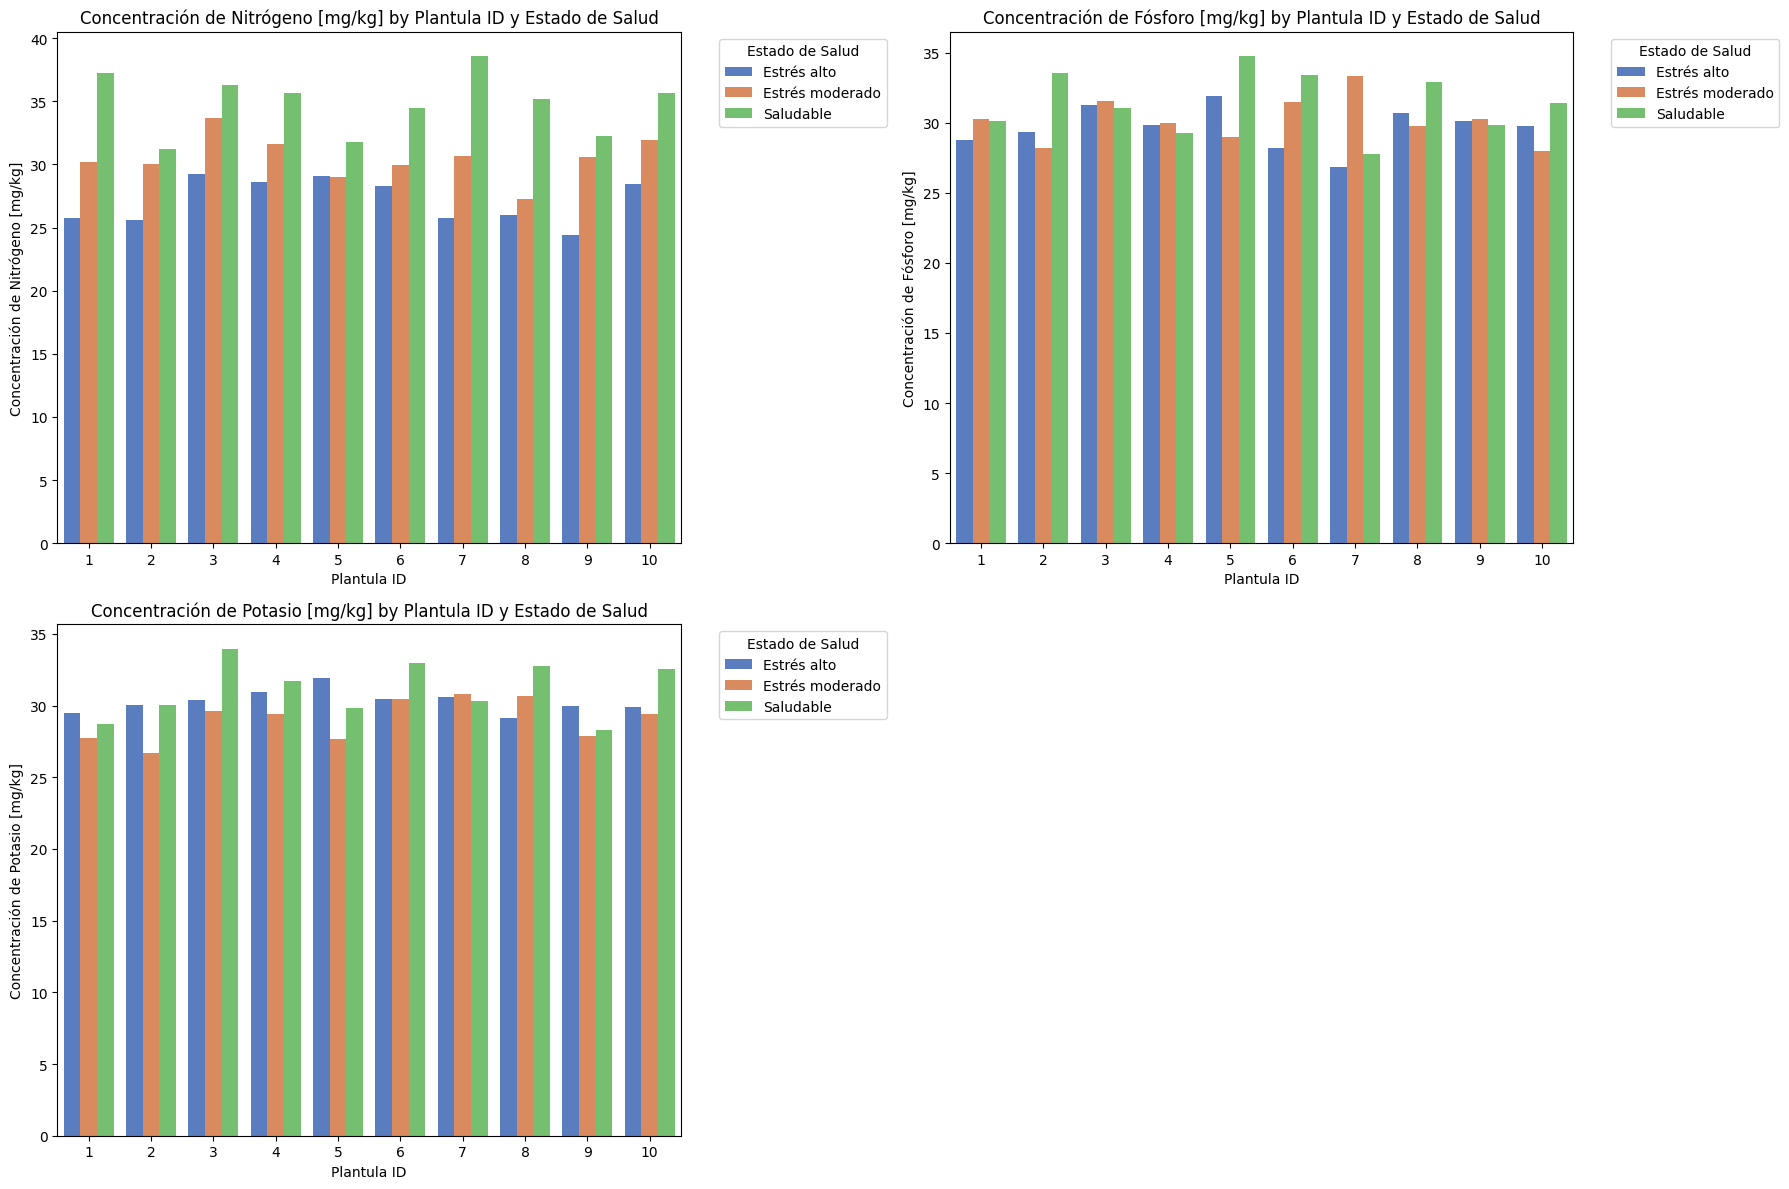

In [ ]:
# Visualizar los niveles de nutrientes en diferentes categorías de estado de salud de la planta (estrés alto, estrés moderado, saludable) para cada ID de planta
# Definir los niveles de nutrientes
nutrients = ['Concentración_de_Nitrógeno_[mg/kg]', 'Concentración_de_Fósforo_[mg/kg]', 'Concentración_de_Potasio_[mg/kg]']

# Set up the plot
plt.figure(figsize=(18, 12))
for i, nutrient in enumerate(nutrients):
    plt.subplot(2, 2, i + 1)
    sns.barplot(
        x='Plantula_ID',
        y=nutrient,
        hue='Estado_de_salud_plantula',
        data=nutrient_status_mean,
        palette='muted'
    )
    plt.title(f'{nutrient.replace("_", " ")} by Plantula ID y Estado de Salud')
    plt.xlabel('Plantula ID')
    plt.ylabel(nutrient.replace('_', ' '))
    plt.legend(title='Estado de Salud', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

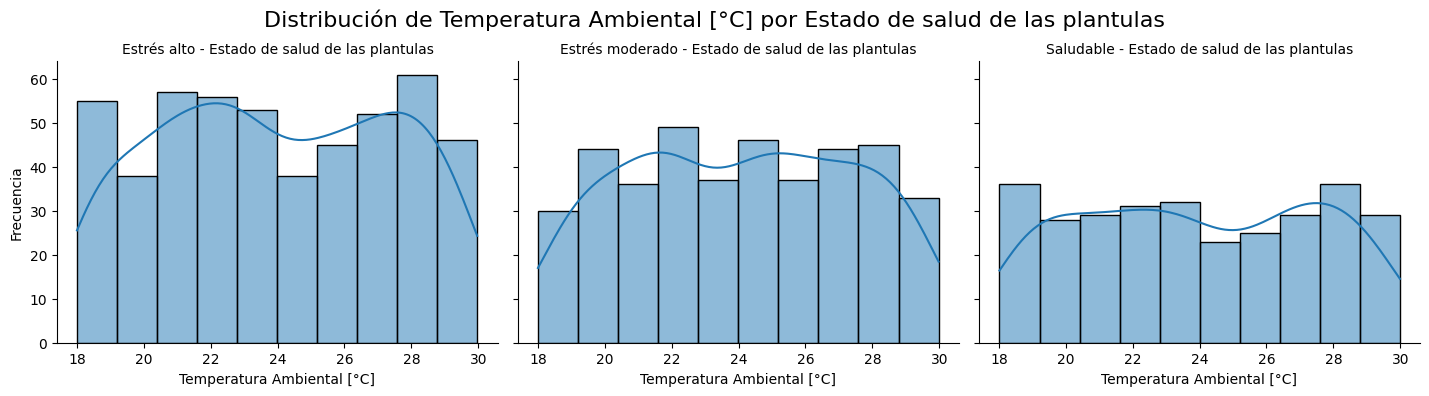

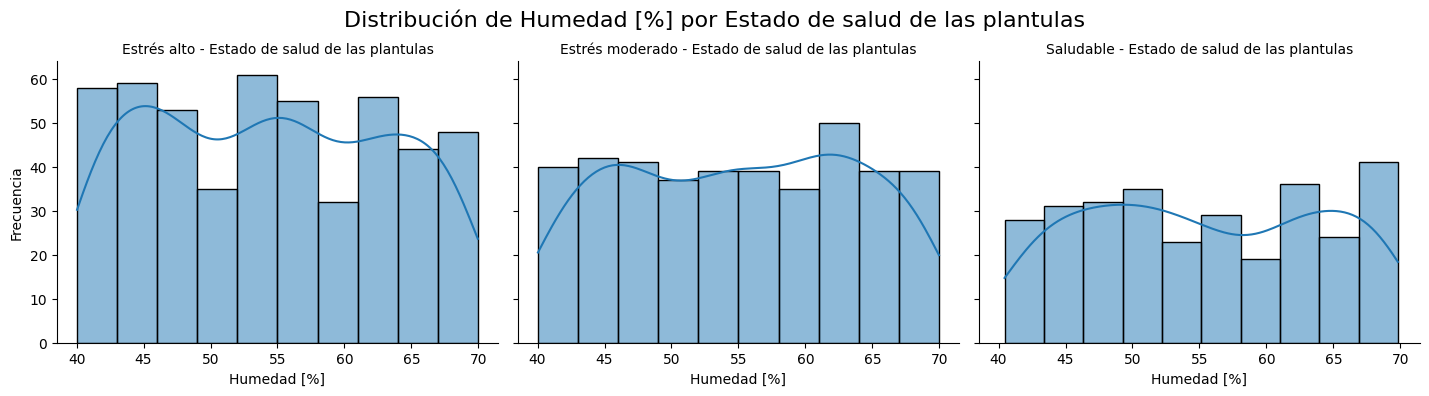

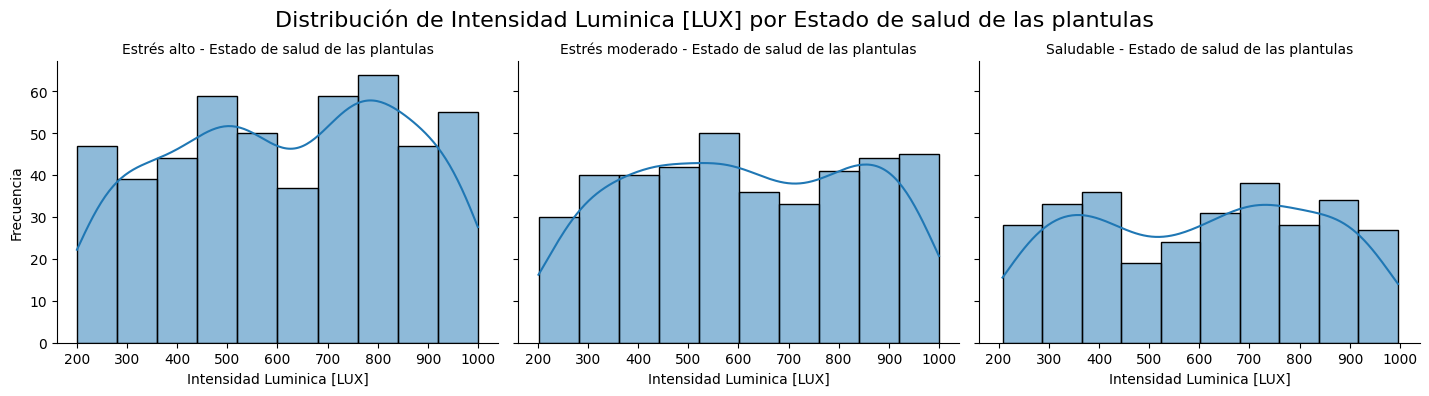

In [ ]:
# Condiciones ambientales vs. estado de salud de la planta usando FacetGrid con estilo mejorado

# Definir las condiciones ambientales para graficar

environmental_conditions = ['Temperatura_Ambiental_[°C]', 'Humedad_[%]', 'Intensidad_Luminica_[LUX]']

# Create FacetGrid plots for each environmental condition with improved styling
for condition in environmental_conditions:
    g = sns.FacetGrid(
        df,
        col='Estado_de_salud_plantula',
        height=4,
        aspect=1.2,
        sharex=True,
        sharey=True,
    )
    g.map(sns.histplot, condition, kde=True, bins=10, color=None)
    g.set_axis_labels(condition.replace('_', ' '), 'Frecuencia')
    g.set_titles("{col_name} - Estado de salud de las plantulas")
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(
        f'Distribución de {condition.replace("_", " ")} por Estado de salud de las plantulas',
        fontsize=16,
        y=0.98
    )
    plt.show()

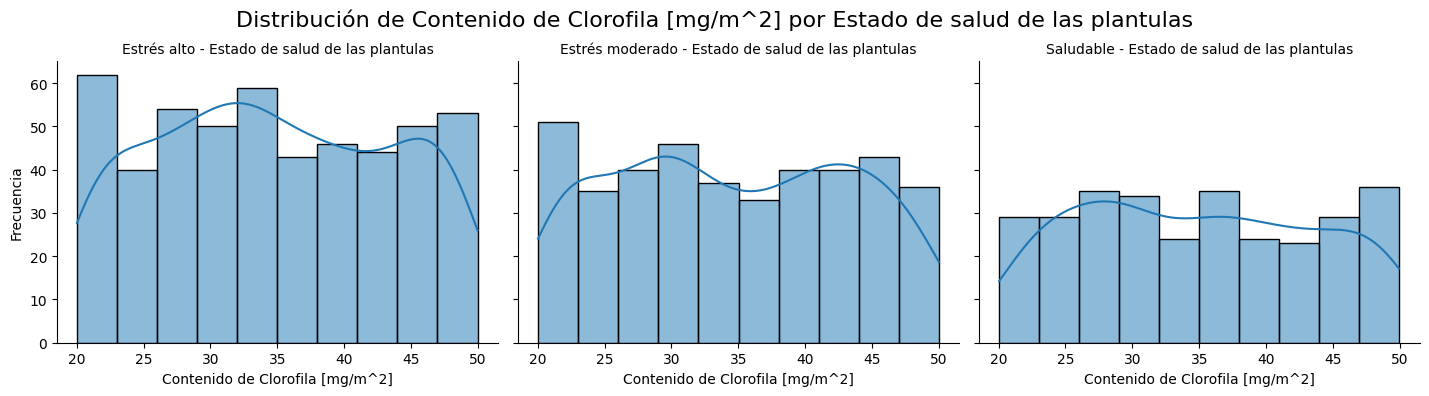

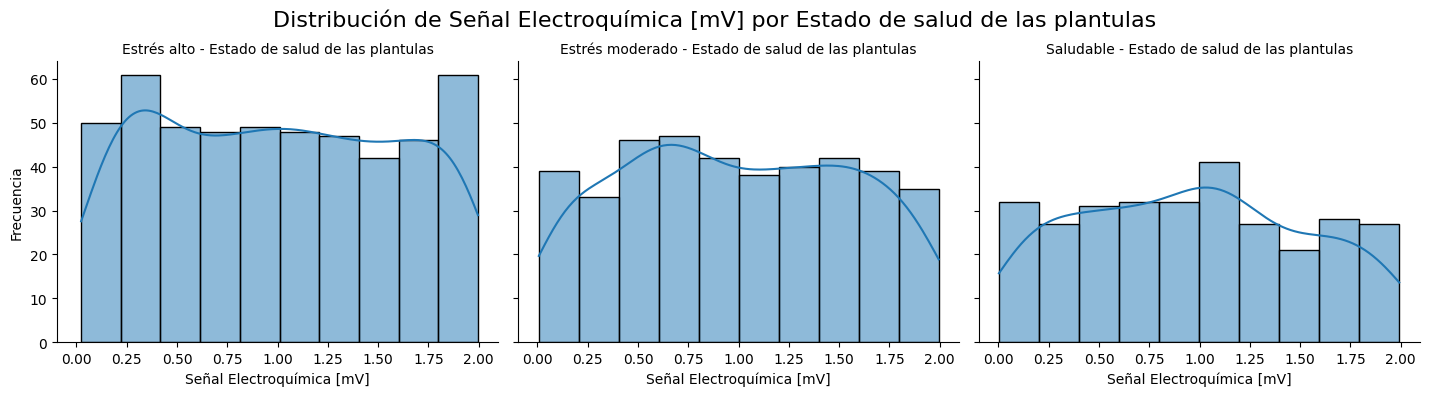

In [ ]:
# Define plant health indicators to plot
health_indicators = ['Contenido_de_Clorofila_[mg/m^2]', 'Señal_Electroquímica_[mV]']

# Create FacetGrid plots for each health indicator
for indicator in health_indicators:
    g = sns.FacetGrid(
        df,
        col='Estado_de_salud_plantula',
        height=4,
        aspect=1.2,
        sharex=True,
        sharey=True
    )
    g.map(sns.histplot, indicator, kde=True, bins=10, color=None)
    g.set_axis_labels(indicator.replace('_', ' '), 'Frecuencia')
    g.set_titles("{col_name} - Estado de salud de las plantulas")
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(
        f'Distribución de {indicator.replace("_", " ")} por Estado de salud de las plantulas',
        fontsize=16,
        y=0.98
    )
    plt.show()

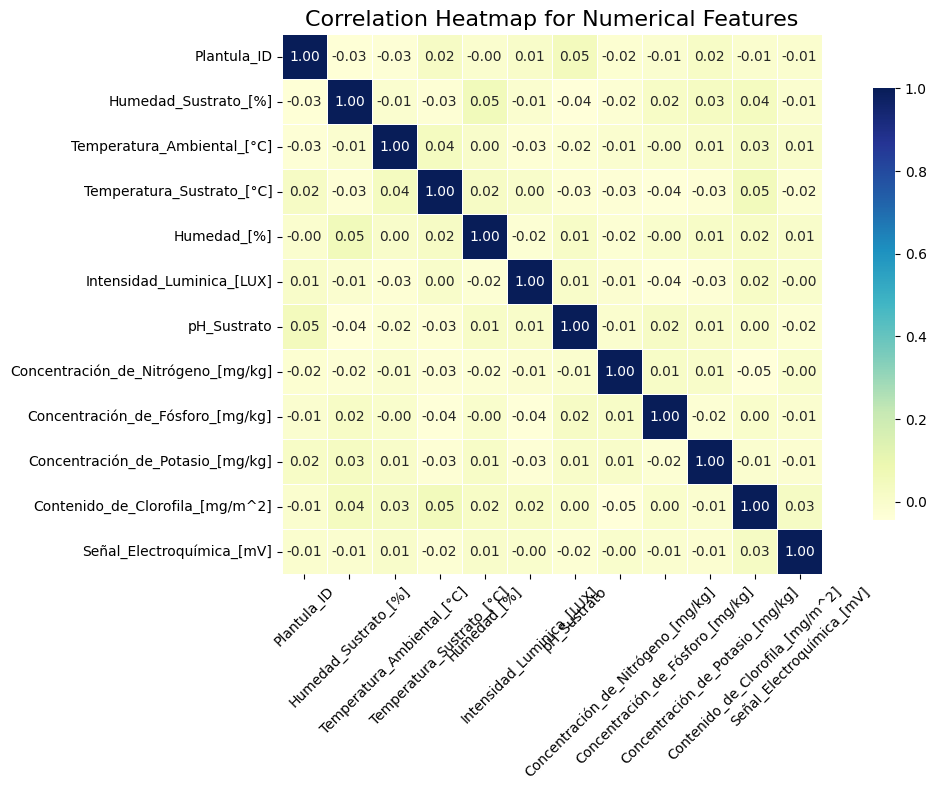

In [ ]:
# Mapa de calor de correlación para características numéricas
numerical_features = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Heatmap for Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Conviertimos la marca de tiempo al formato de fecha y hora y configuramos como índice
df.reset_index(inplace=True) # Reset index before processing Timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Definimos características a analizar
time_series_features = [
    'Humedad_Sustrato_[%]', 'Temperatura_Sustrato_[°C]', 'Temperatura_Ambiental_[°C]',
    'Humedad_[%]','pH_Sustrato', 'Intensidad_Luminica_[LUX]', 'Concentración_de_Nitrógeno_[mg/kg]',
    'Concentración_de_Fósforo_[mg/kg]', 'Concentración_de_Potasio_[mg/kg]'
]

# Remuestrear datos para promedios diarios y semanales
daily_averages = df[time_series_features].resample('D').mean()
weekly_averages = df[time_series_features].resample('W').mean()

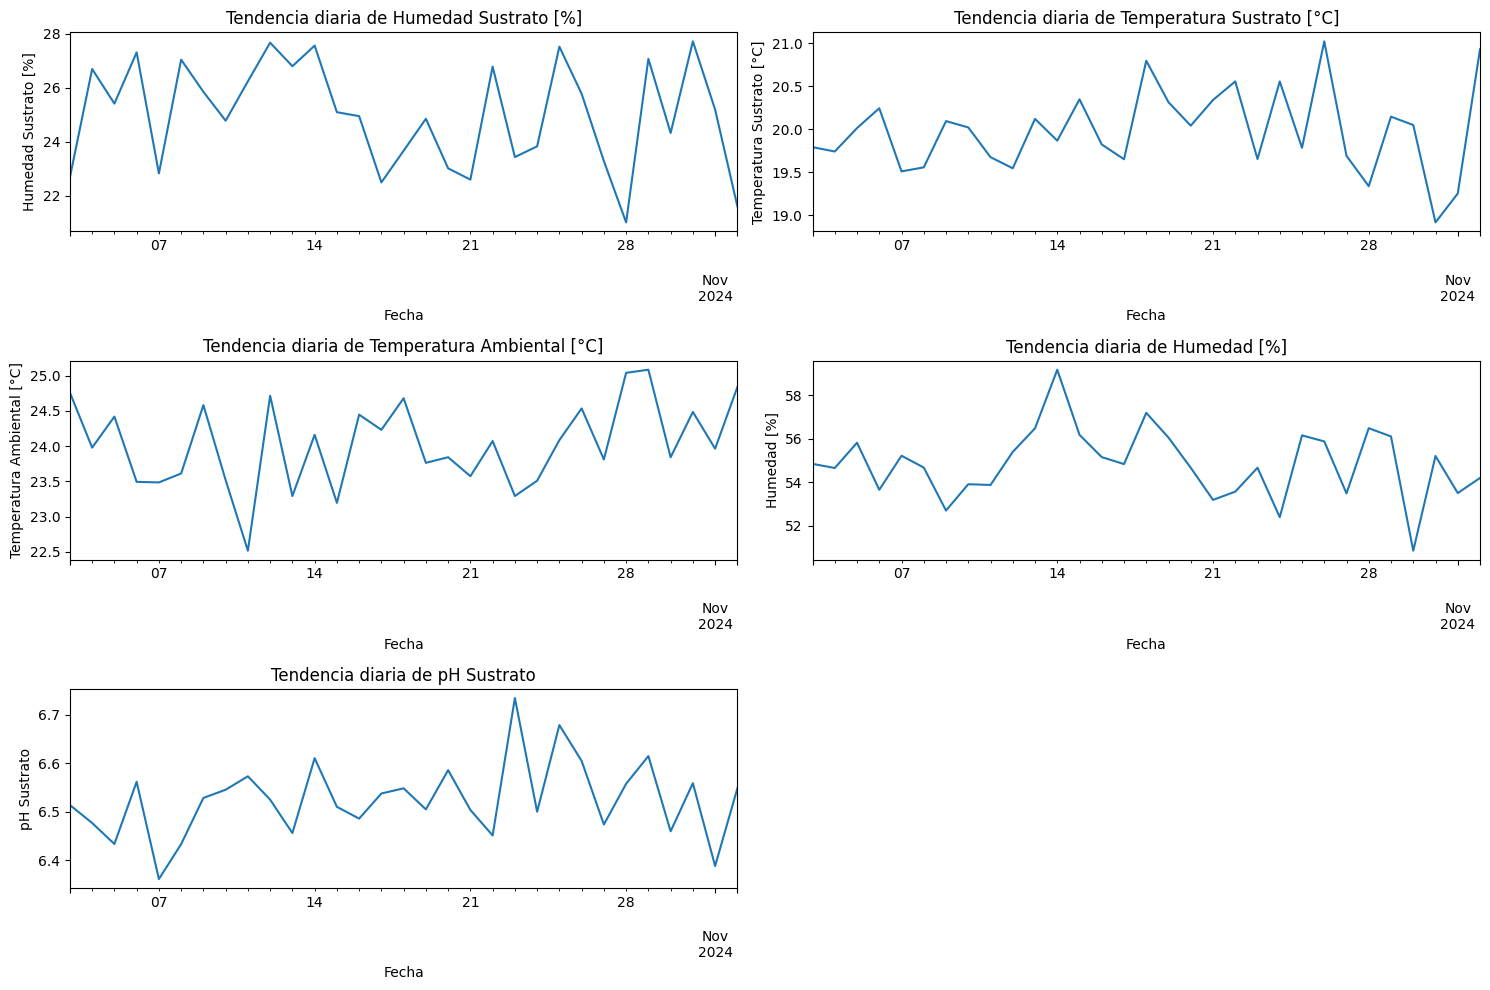

In [ ]:
# Graficamos tendencias diarias para características seleccionadas
plt.figure(figsize=(15, 10))
for i, feature in enumerate(time_series_features[:5]):
    plt.subplot(3, 2, i + 1)
    daily_averages[feature].plot(
        title=f'Tendencia diaria de {feature.replace("_", " ")}',
        ylabel=feature.replace('_', ' '),
        xlabel='Fecha'
    )
plt.tight_layout()
plt.show()

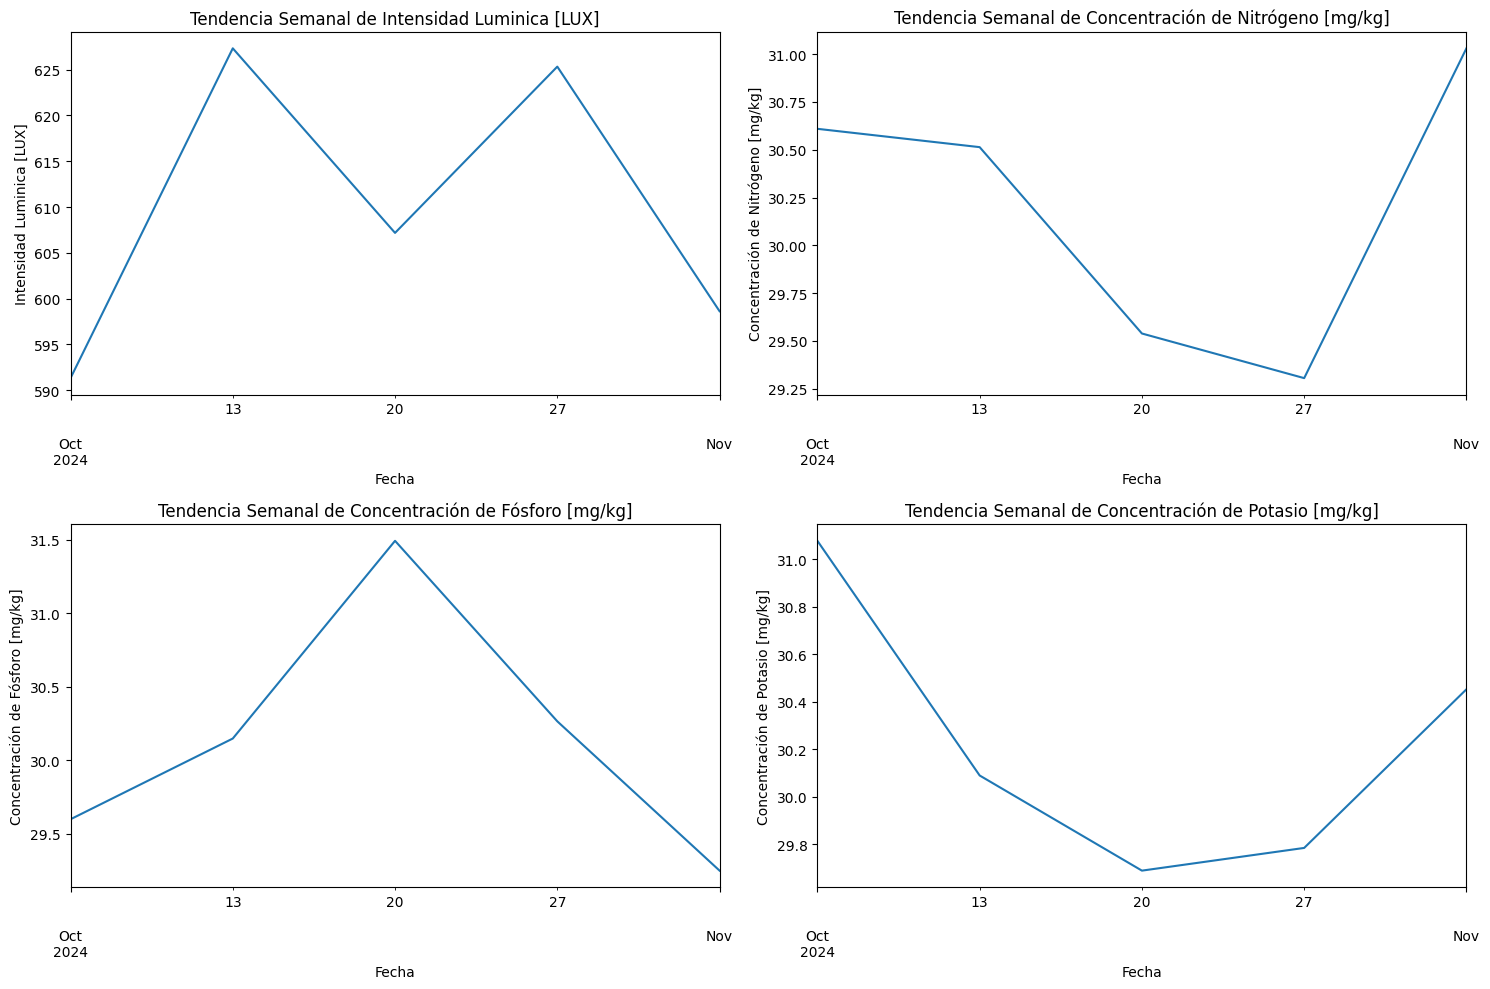

In [ ]:
# Graficamos las tendencias semanales para las 4 características restantes
plt.figure(figsize=(15, 10))
remaining_features = time_series_features[5:]

for i, feature in enumerate(remaining_features):
    plt.subplot(2, 2, i + 1)
    weekly_averages[feature].plot(
        title=f'Tendencia Semanal de {feature.replace("_", " ")}',
        ylabel=feature.replace('_', ' '),
        xlabel='Fecha'
    )
plt.tight_layout()
plt.show()

## Preprocesamiento de datos

In [ ]:
# Mapeo personalizado para el estado de salud de las plantulas
custom_mapping = {'Estrés alto': 2, 'Estrés moderado': 1, 'Saludable': 0}
df['Plant_Health_Status_Encoded'] = df['Estado_de_salud_plantula'].map(custom_mapping)

# Contar valores únicos en el estado de salud de la planta antes de codificar
unique_value_counts_before = df['Estado_de_salud_plantula'].value_counts()

# Contar valores únicos en el estado de salud de la planta codificado después de la codificación
unique_value_counts_after = df['Plant_Health_Status_Encoded'].value_counts()

# Mostrar valores únicos antes y después de la codificación
print("----- Unique Values in Plant Health Status Before Encoding ----- ")
print(unique_value_counts_before)

print("\n----- Unique Values in Plant Health Status After Encoding ----- ")
print(unique_value_counts_after)

----- Unique Values in Plant Health Status Before Encoding ----- 
Estado_de_salud_plantula
Estrés alto        501
Estrés moderado    401
Saludable          298
Name: count, dtype: int64

----- Unique Values in Plant Health Status After Encoding ----- 
Plant_Health_Status_Encoded
2    501
1    401
0    298
Name: count, dtype: int64


In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns

# Z-score Method
z_scores = zscore(df[numerical_features])
outliers_zscore = (np.abs(z_scores) > 3).sum(axis=0)
print("Valores atípicos detectados con puntuaciones Z:")
for i, col in enumerate(numerical_features):
    print(f"{col}: {outliers_zscore[i]}")

Valores atípicos detectados con puntuaciones Z:
Plantula_ID: 0
Humedad_Sustrato_[%]: 0
Temperatura_Ambiental_[°C]: 0
Temperatura_Sustrato_[°C]: 0
Humedad_[%]: 0
Intensidad_Luminica_[LUX]: 0
pH_Sustrato: 0
Concentración_de_Nitrógeno_[mg/kg]: 0
Concentración_de_Fósforo_[mg/kg]: 0
Concentración_de_Potasio_[mg/kg]: 0
Contenido_de_Clorofila_[mg/m^2]: 0
Señal_Electroquímica_[mV]: 0
Plant_Health_Status_Encoded: 0


In [ ]:
# No se detectaron valores atípicos en ninguna de las características numéricas del conjunto de datos.
#Esto indica que los datos numéricos se encuentran dentro del rango esperado, sin valores extremos que superen el umbral de la puntuación Z de ±3.

In [ ]:
# Drop the original Plant_Health_Status column
df = df.drop(columns=['Estado_de_salud_plantula', 'Week'], errors='ignore')

In [ ]:
# Calculate correlations
numerical_df = df.select_dtypes(include=[np.number])
correlations = numerical_df.corr()['Plant_Health_Status_Encoded'].sort_values(ascending=False)

# Convert to DataFrame
correlation_table = correlations.to_frame(name='Correlation with Plant_Health_Status_Encoded').reset_index()
correlation_table.rename(columns={'index': 'Feature'}, inplace=True)

# Display the table
display(correlation_table)

Feature  \
0          Plant_Health_Status_Encoded   
1                          pH_Sustrato   
2                          Plantula_ID   
3            Intensidad_Luminica_[LUX]   
4            Señal_Electroquímica_[mV]   
5           Temperatura_Ambiental_[°C]   
6      Contenido_de_Clorofila_[mg/m^2]   
7            Temperatura_Sustrato_[°C]   
8     Concentración_de_Potasio_[mg/kg]   
9                          Humedad_[%]   
10    Concentración_de_Fósforo_[mg/kg]   
11  Concentración_de_Nitrógeno_[mg/kg]   
12                Humedad_Sustrato_[%]   

    Correlation with Plant_Health_Status_Encoded  
0                                       1.000000  
1                                       0.040648  
2                                       0.032893  
3                                       0.029782  
4                                       0.024111  
5                                       0.002878  
6                                      -0.005619  
7                                      -0.011049  
8                                      -0.022229  
9                                      -0.045300  
10                                     -0.061519  
11                                     -0.266926  
12                                     -0.771725

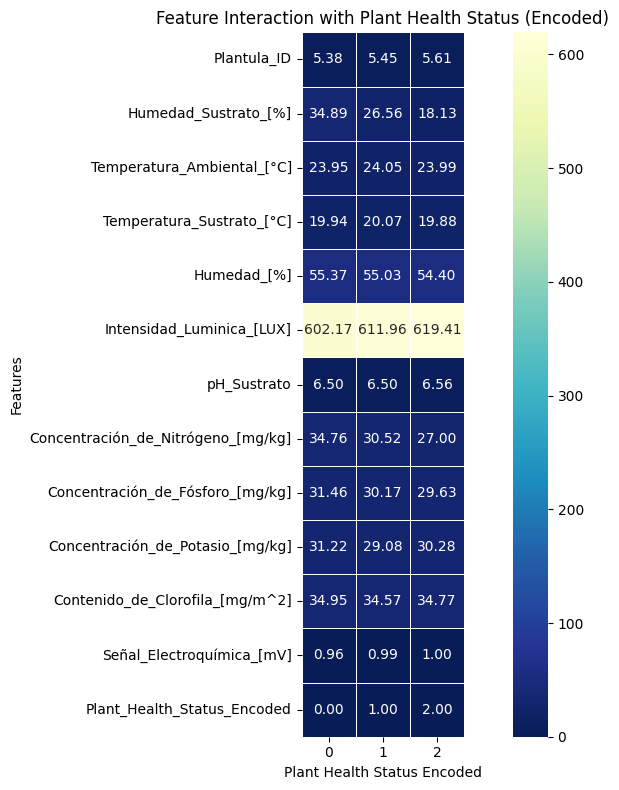

In [ ]:
# Verificar que el 'Estado de salud de la planta codificado' esté incluido y calculamos los valores medios
numerical_df_for_correlation = df.select_dtypes(include=[np.number])
status_correlation = numerical_df_for_correlation.groupby(df['Plant_Health_Status_Encoded']).mean().T

plt.figure(figsize=(10, 8))
sns.heatmap(status_correlation, annot=True, cmap='YlGnBu_r', fmt='.2f', linewidths=0.5, square=True, cbar_kws={"shrink": 1})
plt.title('Feature Interaction with Plant Health Status (Encoded)')
plt.ylabel('Features')
plt.xlabel('Plant Health Status Encoded')
plt.tight_layout()
plt.show()

In [ ]:
# Definirmos características y objetivos
X = df.drop(columns=['Plant_Health_Status_Encoded']) # Características
y = df['Plant_Health_Status_Encoded'] # Objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mostramos las formas de las divisiones para verificación
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (960, 13)
Forma de y_train: (960,)
Forma de X_test: (240, 13)
Forma de y_test: (240,)


In [ ]:
# Aplicamos StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))

## Entrenamiento del modelo y evaluación

In [ ]:
# Modelo
models = {
    "KNN Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Modelos a trabajar
print("Modelos a trabajar:", list(models.keys()))

Modelos a trabajar: ['KNN Classifier', 'Decision Tree', 'Random Forest', 'Gradient Boosting']



Modelo: KNN Classifier
Accuracy: 0.62
AUC: 0.80


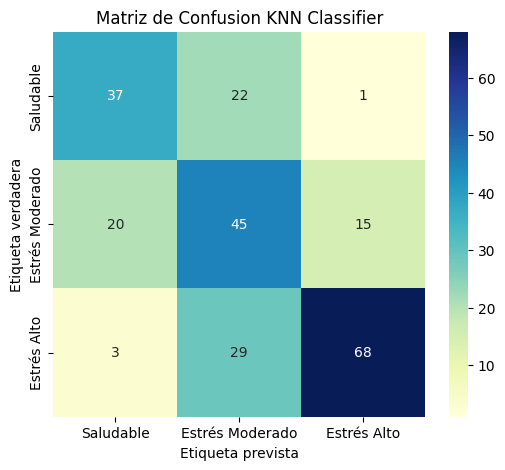

                 precision    recall  f1-score   support

      Saludable       0.62      0.62      0.62        60
Estrés Moderado       0.47      0.56      0.51        80
    Estrés Alto       0.81      0.68      0.74       100

       accuracy                           0.62       240
      macro avg       0.63      0.62      0.62       240
   weighted avg       0.65      0.62      0.63       240


Modelo: Decision Tree
Accuracy: 0.99
AUC: 0.99


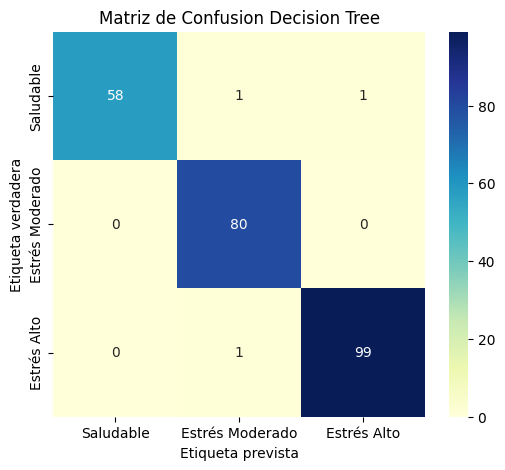

                 precision    recall  f1-score   support

      Saludable       1.00      0.97      0.98        60
Estrés Moderado       0.98      1.00      0.99        80
    Estrés Alto       0.99      0.99      0.99       100

       accuracy                           0.99       240
      macro avg       0.99      0.99      0.99       240
   weighted avg       0.99      0.99      0.99       240


Modelo: Random Forest
Accuracy: 0.99
AUC: 1.00


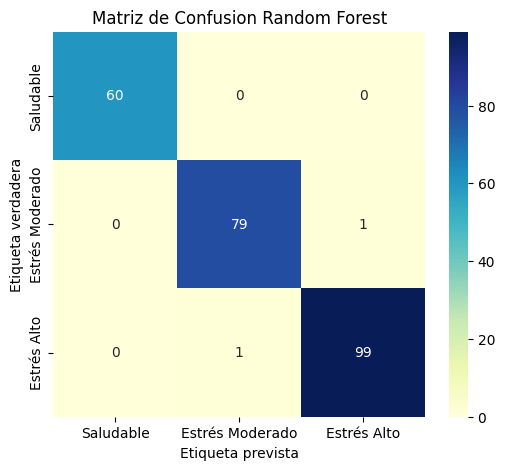

                 precision    recall  f1-score   support

      Saludable       1.00      1.00      1.00        60
Estrés Moderado       0.99      0.99      0.99        80
    Estrés Alto       0.99      0.99      0.99       100

       accuracy                           0.99       240
      macro avg       0.99      0.99      0.99       240
   weighted avg       0.99      0.99      0.99       240


Modelo: Gradient Boosting
Accuracy: 0.99
AUC: 0.99


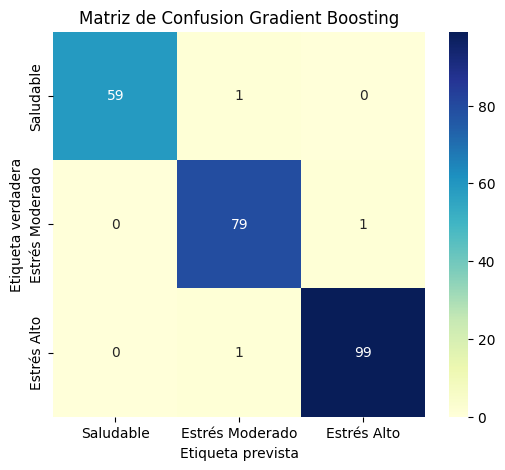

                 precision    recall  f1-score   support

      Saludable       1.00      0.98      0.99        60
Estrés Moderado       0.98      0.99      0.98        80
    Estrés Alto       0.99      0.99      0.99       100

       accuracy                           0.99       240
      macro avg       0.99      0.99      0.99       240
   weighted avg       0.99      0.99      0.99       240



In [ ]:
# Listas para almacenar resultados
results = []

# Entrenamiento y evaluación de cada modelo
for model_name, model in models.items():
    # Entrenamos el modelo
    model.fit(X_train_scaled, y_train)

    # Realizamos predicciones
    y_pred = model.predict(X_test_scaled)

    # Calculamos la precisión (accuracy)
    accuracy = accuracy_score(y_test, y_pred)

    # Calculamos AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        auc = None

    # Guardamos resultados
    results.append({
        "Modelo": model_name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Matriz de confusión": confusion_matrix(y_test, y_pred),
        "Clasificación": classification_report(y_test, y_pred, target_names=['Saludable', 'Estrés Moderado', 'Estrés Alto'])
    })

#  Resultados para cada modelo
for result in results:
    print(f"\nModelo: {result['Modelo']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    if result["AUC"] is not None:
        print(f"AUC: {result['AUC']:.2f}")

    # Visualización de la matriz de confusión
    cm = result["Matriz de confusión"]
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Saludable', 'Estrés Moderado', 'Estrés Alto'],
                yticklabels=['Saludable', 'Estrés Moderado', 'Estrés Alto'])
    plt.title(f'Matriz de Confusion {result["Modelo"]}')
    plt.ylabel('Etiqueta verdadera')
    plt.xlabel('Etiqueta prevista')
    plt.show()

    # Imprimimos informe de clasificación
    print(result["Clasificación"])

In [ ]:
# Preparar una tabla resumen de la evaluación de los modelos
evaluation_summary = []

# Extract the key metrics for each model
for result in results:
    evaluation_summary.append({
        "Model": result["Modelo"],
        "Accuracy": result["Accuracy"],
        "AUC": result["AUC"]
    })

evaluation_summary_df = pd.DataFrame(evaluation_summary)

# Sort by accuracy and display
display(evaluation_summary_df.sort_values(by="Accuracy", ascending=False))

Model  Accuracy       AUC
2      Random Forest  0.991667  0.999588
1      Decision Tree  0.987500  0.989504
3  Gradient Boosting  0.987500  0.993770
0     KNN Classifier  0.625000  0.801452

In [ ]:
# Seleccionamos el modelo con el AUC más alto
best_model_name = max(results, key=lambda x: x["AUC"] if x["AUC"] is not None else -1)["Modelo"]
best_model = models[best_model_name]
print(f"The best model based on AUC is: {best_model_name}")

The best model based on AUC is: Random Forest


# Observaciones clave:

**1.   Los modelos basados en árboles dominan:**

*   el árbol de decisión, el random forest y el Gradient Boosting funcionan significativamente mejor que KNN, logrando una  precisión, un AUC y métricas por clase casi perfectos.

*   El bosque aleatorio y el refuerzo de gradiente son ideales para este conjunto de datos debido a su capacidad para generalizar bien.


**2.   El clasificador KNN presenta dificultades:**

*   Su menor precisión y métricas por clase hacen que KNN sea menos fiable para esta tarea, especialmente para distinguir el estrés moderado.


**3.   Mejor modelo:**

*   Random Forest destaca como el mejor modelo debido a su AUC perfecto (0.99) y su sólido rendimiento en todas las métricas.

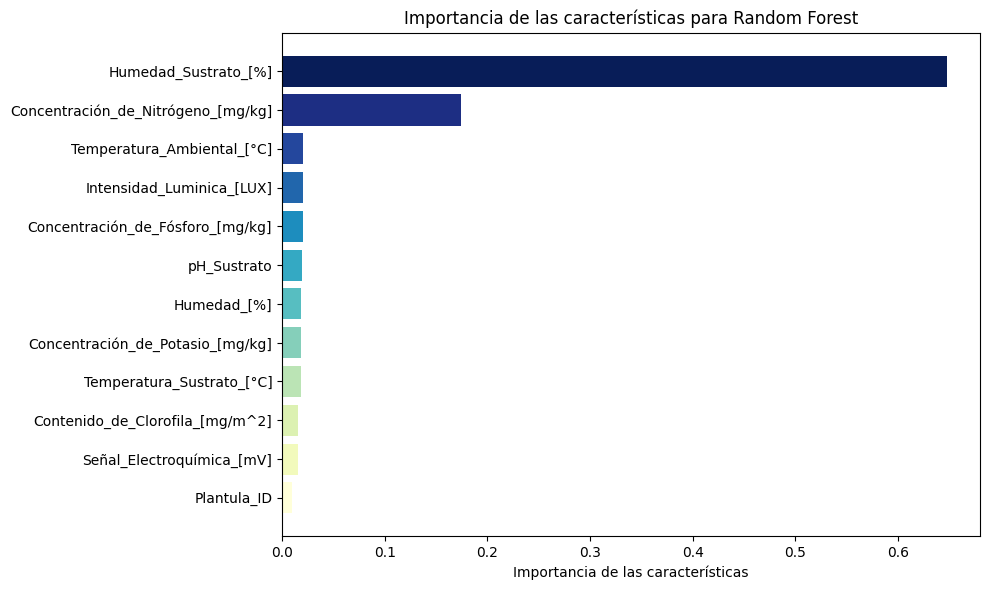

In [ ]:
# Graficasr importancias de las características
if hasattr(best_model, "feature_importances_"):  # Check if the model has feature_importances_
    feature_importances = best_model.feature_importances_
    feature_names = X.columns

    plt.figure(figsize=(10, 6))
    sorted_idx = feature_importances.argsort()[::-1]

    colors = plt.cm.YlGnBu_r(np.linspace(0, 1, len(feature_importances)))

    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center', color=colors)
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Importancia de las características")
    plt.title(f"Importancia de las características para {best_model_name}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"{best_model_name} No admite importancias de características.")

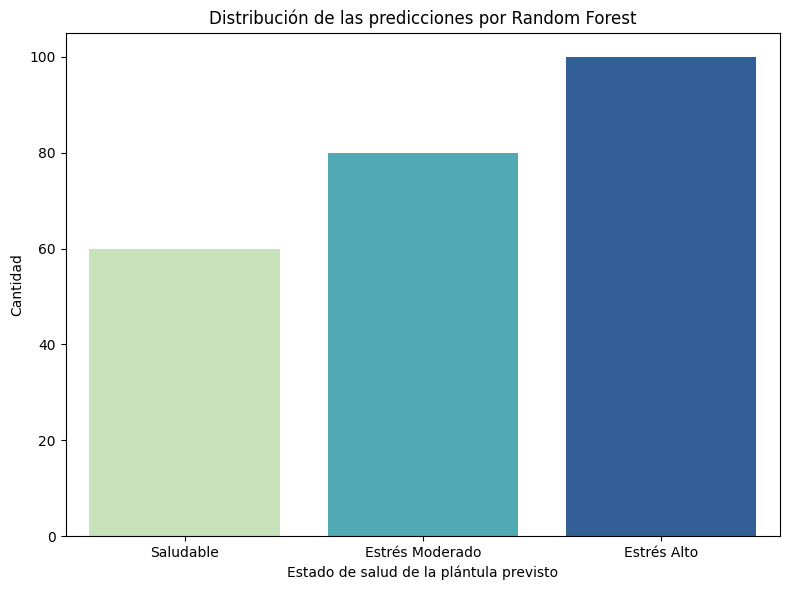

In [ ]:
# Generate Predictions
y_pred_best = best_model.predict(X_test_scaled)

# Plot the Distribution of Predictions
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred_best, palette='YlGnBu')
plt.xticks([0, 1, 2], labels=["Saludable", "Estrés Moderado", "Estrés Alto"])
plt.xlabel("Estado de salud de la plántula previsto")
plt.ylabel("Cantidad")
plt.title(f"Distribución de las predicciones por {best_model_name}")
plt.tight_layout()
plt.show()

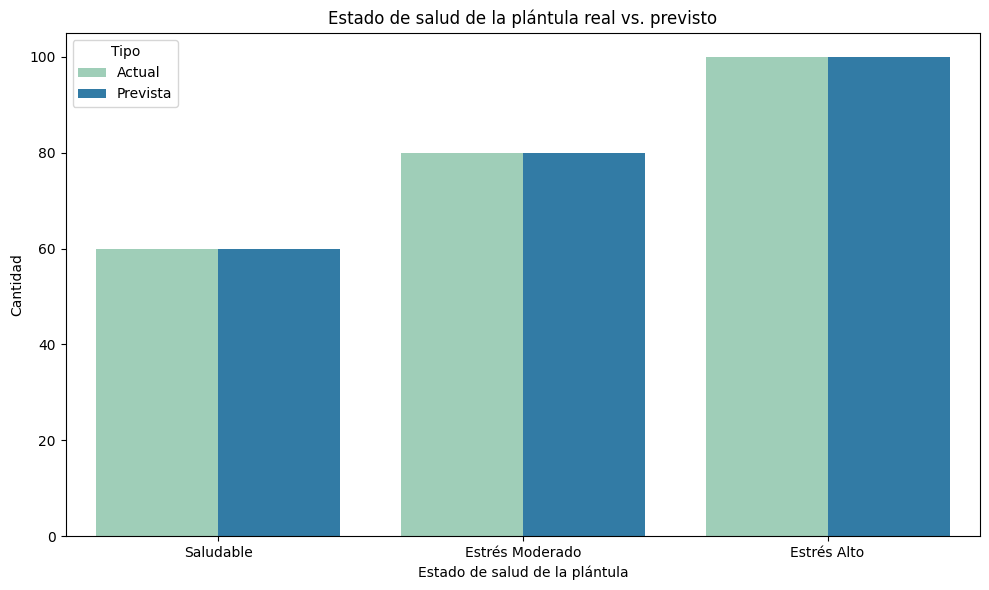

In [ ]:
plt.figure(figsize=(10, 6))

# Convert the actual and predicted values to a DataFrame for comparison
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test,
    'Prevista': best_model.predict(X_test_scaled)
})

sns.countplot(
    data=actual_vs_predicted.melt(var_name='Tipo', value_name='Estado de salud de la plántula'),
    x='Estado de salud de la plántula', hue='Tipo', palette='YlGnBu'
)

plt.xticks([0, 1, 2], labels=["Saludable", "Estrés Moderado", "Estrés Alto"])
plt.xlabel("Estado de salud de la plántula")
plt.ylabel("Cantidad")
plt.title("Estado de salud de la plántula real vs. previsto")
plt.legend(title="Tipo", loc="upper left")
plt.tight_layout()
plt.show()

**Rendimiento general del modelo:**

El modelo muestra una fuerte alineación entre los valores reales y los valores previstos para todas las clases, especialmente para «Estrés alto» y «Estrés moderado».
Las pequeñas discrepancias en las categorías «Sano» y «Estrés moderado» sugieren que estas clases podrían tener espacios de características superpuestos, lo que las hace ligeramente más difíciles de distinguir.